In [1]:
import os
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import openpyxl
import geopandas as gpd
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\geopandas\_compat.py:88: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from matplotlib import pyplot
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans 
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import metrics     
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve  

In [ ]:
#옵션

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [3]:
Qgis_data = gpd.read_file('point)9,3,3,5_2창원시동_조인오류2개해결.geojson') #qgis를 통해 만든 파일

In [4]:
TAAS_data =pd.read_excel('1618_통합.xlsx')                                  #16-18년도 TAAS 차대사람 통합파일

In [5]:
# 내가 생각하는 순서

#0 논문 앞에 이론적 배경 넣어주기

# 1, 결합                         -- 내가 완벽하게 이해요망
# 2. 결측치 처리                  -- 다시 확인하고
# 3. 이상치 확인                  -- 새로 작업

##여기서 소수클래스는 묶어서 원핫처리??


#     변수 추가(--,--) 
# 4. 수치/범주형으로 변환         -- 완벽한 이해요망
# 5. 알맞는 표현식으로 변환       -- 준비중



# EDA 해야징  (부분 시각화작업이겠지??)
### EDA하고 나서 순환속성 변수로 변환해야겠다


# 6. 상관계수 분석                -- 많은 변수를 하면 시각화가
# ## vif 작업도 꼭꼭꼭 병행하자!!!!!!!!!!!!!


# 7. 분산 분석
# 8. 정규화
# 9. 최종 사용할 변수 선택
#=======쉬는날 하루면 될듯=============


# 머신러닝

# 하이퍼 파라미터

# 결과 해석 후 글쓰기 
#===========하루=======================

In [ ]:
# 주석 달때 상황과 인수도 같이 적어주자
#
#
#
#
#

# 데이터 통합

### 전처리1 merge

In [6]:
#Qgis_data.head()
#TAAS_data.head()

In [7]:
print(int(str(TAAS_data['사고번호'][0])[0:8]))
print(" ".join(TAAS_data['시군구'][1].split(' ')[1:3]))
print(TAAS_data['사고일시'][0][-3:-1])

20160101
창원시 마산합포구
12


In [8]:
#새로운 열로 재 갱신한것 같군

TAAS_data['OCCU_DATE']=0
TAAS_data['SIG_KOR_NM']=0
#TAAS_data['OCCU_TM']=0


for i in range(len(TAAS_data)):
    TAAS_data['OCCU_DATE'][i]=int(str(TAAS_data['사고번호'][i])[0:8])
    TAAS_data['SIG_KOR_NM'][i]=" ".join(TAAS_data['시군구'][i].split(' ')[1:3])
    #TAAS_data['OCCU_TM'][i]=TAAS_data['사고일시'][i][-3:-1]
    
TAAS_data['LCLAS'] = TAAS_data['사고내용']

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [9]:
pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left')[pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left').duplicated(['OCCU_DATE','시군구'])]

,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,OCCU_DATE,LCLAS,SCLAS,DEATH,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
20,609189,2018,11,10,17,토요일,20181110,중상사고,차대사람,0,...,맑음,단일로 - 기타,승용,남,30세,상해없음,보행자,남,39세,중상
69,609183,2018,10,31,20,수요일,20181031,중상사고,차대사람,0,...,맑음,교차로 - 교차로횡단보도내,승용,남,35세,상해없음,보행자,남,46세,중상
86,608986,2017,02,09,12,목요일,20170209,경상사고,차대사람,0,...,맑음,단일로 - 기타,승용,남,19세,상해없음,보행자,남,51세,경상
92,609151,2018,07,31,12,화요일,20180731,중상사고,차대사람,0,...,맑음,교차로 - 교차로부근,승용,여,48세,상해없음,보행자,여,3세,중상
93,609190,2018,11,10,19,토요일,20181110,중상사고,차대사람,0,...,맑음,교차로 - 교차로횡단보도내,승용,남,41세,상해없음,보행자,남,42세,중상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2714,607961,2016,09,07,20,수요일,20160907,중상사고,차대사람,0,...,맑음,단일로 - 횡단보도부근,승용,여,33세,상해없음,보행자,여,5세,중상
2715,607961,2016,09,07,20,수요일,20160907,중상사고,차대사람,0,...,맑음,교차로 - 교차로안,승용,남,43세,상해없음,보행자,여,64세,중상
2718,608031,2018,05,07,21,월요일,20180507,경상사고,차대사람,0,...,맑음,단일로 - 기타,화물,남,55세,상해없음,보행자,남,31세,경상
2719,608031,2018,05,07,21,월요일,20180507,경상사고,차대사람,0,...,흐림,단일로 - 기타,승용,여,49세,상해없음,보행자,남,52세,경상


In [10]:
pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left')['시군구'].isnull().sum() #??

26

In [11]:
merge_df = pd.merge(Qgis_data.astype(str), TAAS_data.astype(str),how='left') #???

In [12]:
merge_df.shape

(2728, 93)

In [13]:
df =merge_df.drop_duplicates(['OBJT_ID'], keep='last')   #??

In [14]:
df.shape

(2282, 93)

In [15]:
#del Qgis_data
#del TAAS_data
#df.columns

In [18]:
df.shape

(2282, 93)

In [20]:
# 왜 재갱신 한걸까? 어떤걸 드랍했지?

# 드랍한것' 
# 사고번호', '사고일시',                                                    (의미없음/중복)
#'요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수'  (중복됨)
# 순서 조정겸

df = df[['OBJT_ID', 'OCCU_YEAR', 'OCCU_MT', 'OCCU_DE', 'OCCU_TM', 'OCCU_DAY',
       'OCCU_DATE', 'LCLAS', 'SCLAS', 'DEATH', 'SWPSN', 'SINJPSN', 'INJPSN',
       'DRNKG', 'KID', 'ODSN', 'WLKG', 'VIOLT_CN', 'CTPRVN_CD', 'SGG_CD',
       'EMD_CD', 'X', 'Y', '차대사람_2_은행_거리_BANK_NM_TargetID',
       '차대사람_2_은행_거리_BANK_NM_Distance', '차대사람_1_교차로_거리_NAME_TargetID',
       '차대사람_1_교차로_거리_NAME_Distance', '차대사람_3_의료기관_거리_의료기관명_TargetID',
       '차대사람_3_의료기관_거리_의료기관명_Distance', '차대사람_4_버스정류장_거리_정류장명_TargetID',
       '차대사람_4_버스정류장_거리_정류장명_Distance', '차대사람_5_유치원_거리_유치원명_TargetID',
       '차대사람_5_유치원_거리_유치원명_Distance', '차대사람_6_시외버스터미널_거리_터미널이름_TargetID',
       '차대사람_6_시외버스터미널_거리_터미널이름_Distance', '차대사람_7_육교_거리_육교번호_TargetID',
       '차대사람_7_육교_거리_육교번호_Distance', '의료기관_점갯수', 'HOUS_mean', 'POP_mean',
       'POP_10_mean', 'POP_20_mean', 'POP_30_mean', 'POP_40_mean',
       'POP_50_mean', 'POP_60_O_mean', '차대사람_8_아동,어린이집_거리_번호_TargetID',
       '차대사람_8_아동,어린이집_거리_번호_Distance', '차대사람_9_노인정_거리_번호_TargetID',
       '차대사람_9_노인정_거리_번호_Distance', '의료면적_ARCHAREA', '의료면적_TOTALAREA',
       '200m_거리9_2갯수_의료,주거인구_2count연립주택_일반주택점',
       '200m_거리9_2갯수_의료,주거인구_2count연립주택_연립주택점',
       '도로중심선_DVYN', '도로중심선_RDLN', '도로중심선_RVWD', '도로중심선_ONSD', '도로중심선_ROAD_BT',
       '도로중심선_real_ROAD_BT', 'STRU', 'length', 'won_RN', 'won_ROAD_LT',
       'won_real_ROAD_BT', 'like도로_jibun', '인도_BYYN', '인도_KIND', 'SIG_KOR_NM',
       '창원시동_EMD_KOR_NM', 'geometry',
       '사고유형', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도']]

### 전처리2 컬럼명 재지정/순서 세팅

In [ ]:
# 여기도 순서 조금 손보자

In [508]:
df['사고구분']

0       차대사람
1       차대사람
2       차대사람
4       차대사람
6       차대사람
        ... 
2723    차대사람
2724    차대사람
2725    차대사람
2726    차대사람
2727    차대사람
Name: 사고구분, Length: 2282, dtype: object

In [21]:
df.rename(columns={'OBJT_ID':'id',
                   'OCCU_YEAR':'사고년도',
                   'OCCU_MT':'사고월',
                   'OCCU_DE':'사고일자',
                   'OCCU_TM':'사고시간',
                   'OCCU_DAY':'사고요일',
                   'OCCU_DATE':'사고년월일',
                   'LCLAS':'사고형태(Y값)',
                   'SCLAS':'사고구분',
                   'DEATH':'사망자수',
                   'SWPSN':'중상자수',
                   'SINJPSN':'경상자수',
                   'INJPSN':'부상신고자수',
                   'DRNKG':'음주운전사고',
                   'KID':'어린이사고',
                   'ODSN':'노인사고',
                   'WLKG':'보행자사고',
                   'VIOLT_CN':'법규위반내용',
                   'CTPRVN_CD':'시도코드',
                   'SGG_CD':'시군구코드',
                   'EMD_CD':'시도코드',
                   'X':'X(위치)',
                   'Y':'Y(위치)',
                   '차대사람_2_은행_거리_BANK_NM_TargetID':'가까운은행',
                   '차대사람_2_은행_거리_BANK_NM_Distance':'은행거리',
                   '차대사람_1_교차로_거리_NAME_TargetID':'가까운교차로',
                   '차대사람_1_교차로_거리_NAME_Distance':'교차로거리',
                   '차대사람_3_의료기관_거리_의료기관명_TargetID':'가까운의료기관',
                   '차대사람_3_의료기관_거리_의료기관명_Distance':'의료기관거리',
                   '차대사람_4_버스정류장_거리_정류장명_TargetID':'가까운버스정류장',
                   '차대사람_4_버스정류장_거리_정류장명_Distance':'버스정류장거리',
                   '차대사람_5_유치원_거리_유치원명_TargetID':'가까운유치원',
                   '차대사람_5_유치원_거리_유치원명_Distance':'유치원거리',
                   '차대사람_6_시외버스터미널_거리_터미널이름_TargetID':'가까운시외/고속버스터미널',
                   '차대사람_6_시외버스터미널_거리_터미널이름_Distance':'시외고속버스터미널거리',
                   '차대사람_7_육교_거리_육교번호_TargetID':'가까운육교번호',
                   '차대사람_7_육교_거리_육교번호_Distance':'육교거리',
                   '의료기관_점갯수':'의료기관_갯수',
                   'HOUS_mean':'원형200m내_16_세대수',
                   'POP_mean':'원형200m내_16_인구수',
                   'POP_10_mean':'원형200m내_16_10대인구',
                   'POP_20_mean':'원형200m내_16_20대인구',
                   'POP_30_mean':'원형200m내_16_30대인구',
                   'POP_40_mean':'원형200m내_16_40대인구',
                   'POP_50_mean':'원형200m내_16_50대인구',
                   'POP_60_O_mean':'원형200m내_16_60대이상인구',
                   '차대사람_8_아동,어린이집_거리_번호_TargetID':'가까운 아동,어린이집',
                   '차대사람_8_아동,어린이집_거리_번호_Distance':'아동,어린이집거리',
                   '차대사람_9_노인정_거리_번호_TargetID':'가까운 노인정',
                   '차대사람_9_노인정_거리_번호_Distance':'노인정거리',
                   '의료면적_ARCHAREA':'원형200m내_의료기관크기',
                   '의료면적_TOTALAREA':'원형200m내_의료기관거주건물 총크기',
                   '200m_거리9_2갯수_의료,주거인구_2count연립주택_일반주택점':'원형200m내_일반주택수',
                   '200m_거리9_2갯수_의료,주거인구_2count연립주택_연립주택점':'원형200m내_연립주택수',
                   '도로중심선_DVYN':'중심선_분리대유무',
                   '도로중심선_RDLN':'중심선_차로수',
                   '도로중심선_RVWD':'중심선_도로폭',
                   '도로중심선_ONSD':'중심선_일반통행',
                   '도로중심선_ROAD_BT':'중심선_1/3크기 도로폭',
                   '도로중심선_real_ROAD_BT':'중심선_기재된 도로폭',
                   'STRU':'분리대_구조',
                   'length':'분리대길이_사용불가',
                   'won_RN':'도로구간_도로명',
                   'won_ROAD_LT':'도로구간_도로길이',
                   'won_real_ROAD_BT':'도로구간_도로폭',
                   'like도로_jibun':'연속지적도_도로명',
                   '인도_BYYN':'인도_자전거도로 유/무',
                   '인도_KIND':'인도_종류',
                   'SIG_KOR_NM':'창원시구',
                   '창원시동_EMD_KOR_NM':'창원시동',
                   'geometry':'geometry',
                   '사고유형':'사고유형',
                   '법규위반':'법규위반',
                   '노면상태':'노면상태',
                   '기상상태':'기상상태',
                   '도로형태':'도로형태',
                   '가해운전자 차종':'가해운전자 차종',
                   '가해운전자 성별':'가해운전자 성별',
                   '가해운전자 연령':'가해운전자 연령',
                   '가해운전자 상해정도':'가해운전자 상해정도',
                   '피해운전자 차종':'피해자 차종',
                   '피해운전자 성별':'피해자 성별',
                   '피해운전자 연령':'피해자 연령',
                   '피해운전자 상해정도':'피해자 상해정도'
                  }, inplace=True)

In [73]:
#df.info()

In [80]:
df.columns

Index(['id', '사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고년월일', '사고형태(Y값)',
       '사고구분', '사망자수', '중상자수', '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고',
       '보행자사고', '법규위반내용', '시도코드', '시군구코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행',
       '은행거리', '가까운교차로', '교차로거리', '가까운의료기관', '의료기관거리', '가까운버스정류장', '버스정류장거리',
       '가까운유치원', '유치원거리', '가까운시외/고속버스터미널', '시외고속버스터미널거리', '가까운육교번호', '육교거리',
       '의료기관_갯수', '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '가까운 아동,어린이집', '아동,어린이집거리',
       '가까운 노인정', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭',
       '중심선_일반통행', '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가',
       '도로구간_도로명', '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무',
       '인도_종류', '창원시구', '창원시동', 'geometry', '사고유형', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 차종', '가해운

#  
# 결측치

In [147]:
#사고유형4가지 법규위반내용은 나중에 시각화에 써먹어야겠다. ##라고썼넹;;

In [148]:
print(data_1['사고유형'].isnull().sum())
data_1['사고유형'].value_counts()

26


차대사람 - 횡단중           1152
차대사람 - 기타             458
차대사람 - 차도통행중          392
차대사람 - 길가장자리구역통행중     177
차대사람 - 보도통행중           77
Name: 사고유형, dtype: int64

In [450]:
#여기서부터
#결측치 처리

data_1 = df.copy()

In [451]:
data_1 =data_1.set_index('id')

In [452]:
data_1.isnull().sum().sum()

7991

In [453]:
data_1.isnull().sum()[data_1.isnull().sum() >0]

원형200m내_16_세대수          209
원형200m내_16_인구수          209
원형200m내_16_10대인구        209
원형200m내_16_20대인구        209
원형200m내_16_30대인구        209
원형200m내_16_40대인구        209
원형200m내_16_50대인구        209
원형200m내_16_60대이상인구      209
원형200m내_의료기관크기          994
원형200m내_의료기관거주건물 총크기    994
중심선_차로수                 752
중심선_도로폭                 752
중심선_기재된 도로폭             881
도로구간_도로길이               804
도로구간_도로폭                804
사고유형                     26
법규위반                     26
노면상태                     26
기상상태                     26
도로형태                     26
가해운전자 차종                 26
가해운전자 성별                 26
가해운전자 연령                 26
가해운전자 상해정도               26
피해자 차종                   26
피해자 성별                   26
피해자 연령                   26
피해자 상해정도                 26
dtype: int64

In [454]:
#그리고 결측치 먼저 해결하자

In [455]:
print('0갯수 ',len(data_1[data_1['원형200m내_16_세대수']==0]))

data_1['원형200m내_16_세대수'].value_counts(dropna=False)

0갯수  0


NaN           209
1.820000        9
0.910000        9
2.360000        9
2.730000        8
             ... 
53.545000       1
56.464286       1
47.705000       1
52.063333       1
107.500000      1
Name: 원형200m내_16_세대수, Length: 1608, dtype: int64

In [456]:
print('0갯수 ',len(data_1[data_1['원형200m내_의료기관크기']==0]))

data_1['원형200m내_의료기관크기'].value_counts(dropna=False)

0갯수  168


NaN           994
0.0000        168
673.0700       25
573.2400       22
643.4700       20
248.3550       19
735.8300       18
414.1800       18
167.0300       17
528.1700       16
611.7800       15
444.5100       14
279.7200       14
559.5500       14
1416.6700      13
1180.9180      13
10208.3700     13
649.3800       13
551.1300       12
1004.2300      12
2406.0600      12
501.9500       11
1615.9600      11
586.4100       11
407.4300       10
273.2600       10
195.0000       10
128.1400       10
142.7750       10
142.4860       10
1836.2674      10
316.8800       10
346.5100       10
572.6400       10
639.0500       10
749.9650        9
1227.0400       9
336.6300        8
582.0000        8
1643.2600       8
587.7600        8
322.2100        8
249.3900        8
5631.8300       7
237.0900        7
826.1850        7
426.7600        7
2852.4600       7
1111.0200       7
305.9000        7
344.6900        7
310.5200        6
185.2200        6
732.0500        6
912.0000        6
336.1230  

In [457]:
#직접 넣은 변수인데 왜 결측치가 생성된걸까?
#gis 를 확인해야되겠다.

#

#### gis 를 확인해야되겠다.!!!

In [458]:
data_1['원형200m내_16_세대수'] = data_1['원형200m내_16_세대수'].fillna(0)
data_1['원형200m내_16_인구수'] = data_1['원형200m내_16_인구수'].fillna(0)
data_1['원형200m내_16_10대인구'] = data_1['원형200m내_16_10대인구'].fillna(0)
data_1['원형200m내_16_20대인구'] = data_1['원형200m내_16_20대인구'].fillna(0)
data_1['원형200m내_16_30대인구'] = data_1['원형200m내_16_30대인구'].fillna(0)
data_1['원형200m내_16_40대인구'] = data_1['원형200m내_16_40대인구'].fillna(0)
data_1['원형200m내_16_50대인구'] = data_1['원형200m내_16_50대인구'].fillna(0)
data_1['원형200m내_16_60대이상인구'] = data_1['원형200m내_16_60대이상인구'].fillna(0)
data_1['원형200m내_의료기관크기'] = data_1['원형200m내_의료기관크기'].fillna(0)
data_1['원형200m내_의료기관거주건물 총크기'] = data_1['원형200m내_의료기관거주건물 총크기'].fillna(0)

In [459]:
#열은 날려도 되겠다.
# 1/3은 살아있으니까

#결측치가 많은 애들

# 결측치 열날리기 axis=1 열 inplace는 재갱신
data_1.drop(['중심선_차로수','중심선_도로폭',
             '중심선_기재된 도로폭','도로구간_도로길이',
             '도로구간_도로폭'],axis=1,inplace=True)

In [460]:
#qgis 미숙으로 생긴문제

#결측치가 많은데 왜 표기는 안되지?


#gis에서 None를 문자로 받은건가??
#결측치 취급은 아니지만 None값으로 채워져있는애들



data_1.drop(['중심선_분리대유무','중심선_일반통행','분리대_구조','분리대길이_사용불가',
            '도로구간_도로명','연속지적도_도로명','인도_자전거도로 유/무','인도_종류'],axis=1,inplace=True)

In [461]:
#법규위반내용이랑 거의 중복됨
#미분류가 4건있지만 항목에 수치가 아주 약간씩 다르니까 자료를 더보자.

data_1.drop(['법규위반'],axis=1,inplace=True)

In [462]:
## 26개짜리는 행을 날려버리자


##근데 이거 결합할때 날라간것 아니였어???
## 결합도 다시 체크해야겠따.

#아마 26개가 같은 행일꺼다
# 결합을 꼭 다시 체크하자!!!!!!!!!!!!!!!!!!!!!

#행 하나하나 설정하는거 말고 다른방법없나?
#특정열안에서 결측치 있는 행삭제!!
data_1.dropna(subset=['사고유형'],inplace=True)

In [463]:
df.isnull().sum().sum()


#내가 만든 변수인데 왜 결측치가 생겼지?
# 0값이 nan으로 들어간듯이 아니였따!!!!

7991

In [464]:
#결측치가 제거되었는지 확인

print(df.isnull().sum().sum())                 #결합만 한것
print(data_1.isnull().sum().sum())             #결측치 제거한것

7991
0


In [465]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   사고년도                  2256 non-null   int32  
 1   사고월                   2256 non-null   int32  
 2   사고일자                  2256 non-null   int32  
 3   사고시간                  2256 non-null   int32  
 4   사고요일                  2256 non-null   object 
 5   사고년월일                 2256 non-null   int32  
 6   사고형태(Y값)              2256 non-null   object 
 7   사고구분                  2256 non-null   object 
 8   사망자수                  2256 non-null   int32  
 9   중상자수                  2256 non-null   int32  
 10  경상자수                  2256 non-null   int32  
 11  부상신고자수                2256 non-null   int32  
 12  음주운전사고                2256 non-null   object 
 13  어린이사고                 2256 non-null   object 
 14  노인사고                  2256 non-null   object 
 15  보행자사고              

### 한눈에 봐도 아닌 열 삭제과 시각화에도 안쓸 열 삭제

In [466]:
#백업 활성화 // 나중에 작업끝나면 지워주기

#back_up_1 = data_1.copy()



In [467]:
data_1.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고년월일', '사고형태(Y값)', '사고구분',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고',
       '법규위반내용', '시도코드', '시군구코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행', '은행거리',
       '가까운교차로', '교차로거리', '가까운의료기관', '의료기관거리', '가까운버스정류장', '버스정류장거리', '가까운유치원',
       '유치원거리', '가까운시외/고속버스터미널', '시외고속버스터미널거리', '가까운육교번호', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '가까운 아동,어린이집', '아동,어린이집거리',
       '가까운 노인정', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_1/3크기 도로폭', '창원시구', '창원시동',
       'geometry', '사고유형', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

In [468]:
data_1.drop(['시도코드','시군구코드','시도코드','X(위치)','Y(위치)',
            '가까운은행','가까운교차로','가까운의료기관','가까운버스정류장','가까운유치원',
            '가까운시외/고속버스터미널','가까운육교번호','가까운 아동,어린이집','가까운 노인정'],axis=1,inplace=True)

In [469]:
#사고년월일 위에 나눠서 존재함
# 지오메트리 수치는 전혀 도움안됨
# 사고구분 - 전부다 차대사람

data_1.drop(['사고년월일','geometry','사고구분'],axis=1,inplace=True)

In [470]:
data_1.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고형태(Y값)', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고', '법규위반내용', '은행거리',
       '교차로거리', '의료기관거리', '버스정류장거리', '유치원거리', '시외고속버스터미널거리', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '아동,어린이집거리', '노인정거리',
       '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기', '원형200m내_일반주택수',
       '원형200m내_연립주택수', '중심선_1/3크기 도로폭', '창원시구', '창원시동', '사고유형', '노면상태',
       '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

In [471]:
#  확실한 열 정제
#  결측치 삭제
#  이상치 탐색
#  EDA


# 분석 목적에 맞춰 더 삭제
# 추가 정제?? 애는 어디쯤 이었어야되지??

### 사고 이후 알 수있는 정보 삭제

#### -내가 하는 분석 목적에 맞지 않기 때문에 삭제하는게 맞을까?? 이후 어떻게 활용될지 모르는데??

#### -시각화용을 위해 data_1은 남겨두고 2로 이동

In [472]:
data_2 = data_1.copy()

In [473]:
#data_1.drop([''],axis=1,inplace=True)

In [474]:
data_2['음주운전사고'].value_counts()


#사고를 1로 빈칸을 0으로 하는작업을 해줘야겠다.
#사고를 1로 빈칸을 0으로 하는작업을 해줘야겠다.
#사고를 1로 빈칸을 0으로 하는작업을 해줘야겠다.

None    2209
O         47
Name: 음주운전사고, dtype: int64

In [476]:
#가해 운전자 차종이랑 성별 연령은 놔두자 시각화용으로

In [477]:
data_2.drop(['사망자수','중상자수','경상자수','부상신고자수'],axis=1,inplace=True)

In [478]:
data_2.drop(['가해운전자 차종','가해운전자 성별','가해운전자 연령','가해운전자 상해정도',
            '피해자 차종','피해자 성별','피해자 연령','피해자 상해정도'],axis=1,inplace=True)

In [479]:
data_2.drop(['음주운전사고','어린이사고','노인사고','보행자사고'],axis=1,inplace=True)

In [498]:
# 확신없이 애들 적어두기


#창원시동
data_2.drop(['창원시동'],axis=1,inplace=True)

In [499]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   사고년도                  2256 non-null   int32  
 1   사고월                   2256 non-null   int32  
 2   사고일자                  2256 non-null   int32  
 3   사고시간                  2256 non-null   int32  
 4   사고요일                  2256 non-null   object 
 5   사고형태(Y값)              2256 non-null   object 
 6   법규위반내용                2256 non-null   object 
 7   은행거리                  2256 non-null   float64
 8   교차로거리                 2256 non-null   float64
 9   의료기관거리                2256 non-null   float64
 10  버스정류장거리               2256 non-null   float64
 11  유치원거리                 2256 non-null   float64
 12  시외고속버스터미널거리           2256 non-null   float64
 13  육교거리                  2256 non-null   float64
 14  의료기관_갯수               2256 non-null   float64
 15  원형200m내_16_세대수     

In [505]:
data_2['사고유형'].value_counts()

차대사람 - 횡단중           1152
차대사람 - 기타             458
차대사람 - 차도통행중          392
차대사람 - 길가장자리구역통행중     177
차대사람 - 보도통행중           77
Name: 사고유형, dtype: int64

In [503]:
data_2['법규위반내용'].value_counts()

안전운전 의무 불이행    1596
보행자 보호의무 위반     412
신호위반            136
기타               61
중앙선 침범           22
교차로 통행방법 위반      19
과속                9
안전거리 미확보          1
Name: 법규위반내용, dtype: int64

In [415]:
data_2['법규위반내용'].value_counts()

안전운전 의무 불이행    1596
보행자 보호의무 위반     412
신호위반            136
기타               61
중앙선 침범           22
교차로 통행방법 위반      19
과속                9
안전거리 미확보          1
Name: 법규위반내용, dtype: int64

In [341]:
data_2['사고유형'].value_counts()

차대사람 - 횡단중           1152
차대사람 - 기타             458
차대사람 - 차도통행중          392
차대사람 - 길가장자리구역통행중     177
차대사람 - 보도통행중           77
Name: 사고유형, dtype: int64

In [ ]:
#법규위반 중복되니까 위에서 컷하자

#원핫 하기전에 비닝하고 원핫 돌리자!!

In [314]:
data_2['노면상태'].value_counts()

포장 - 건조       2015
포장 - 젖음/습기     133
포장 - 습기        101
포장 - 기타          3
비포장 - 건조         2
포장 - 적설          1
포장 - 서리/결빙       1
Name: 노면상태, dtype: int64

In [ ]:
#

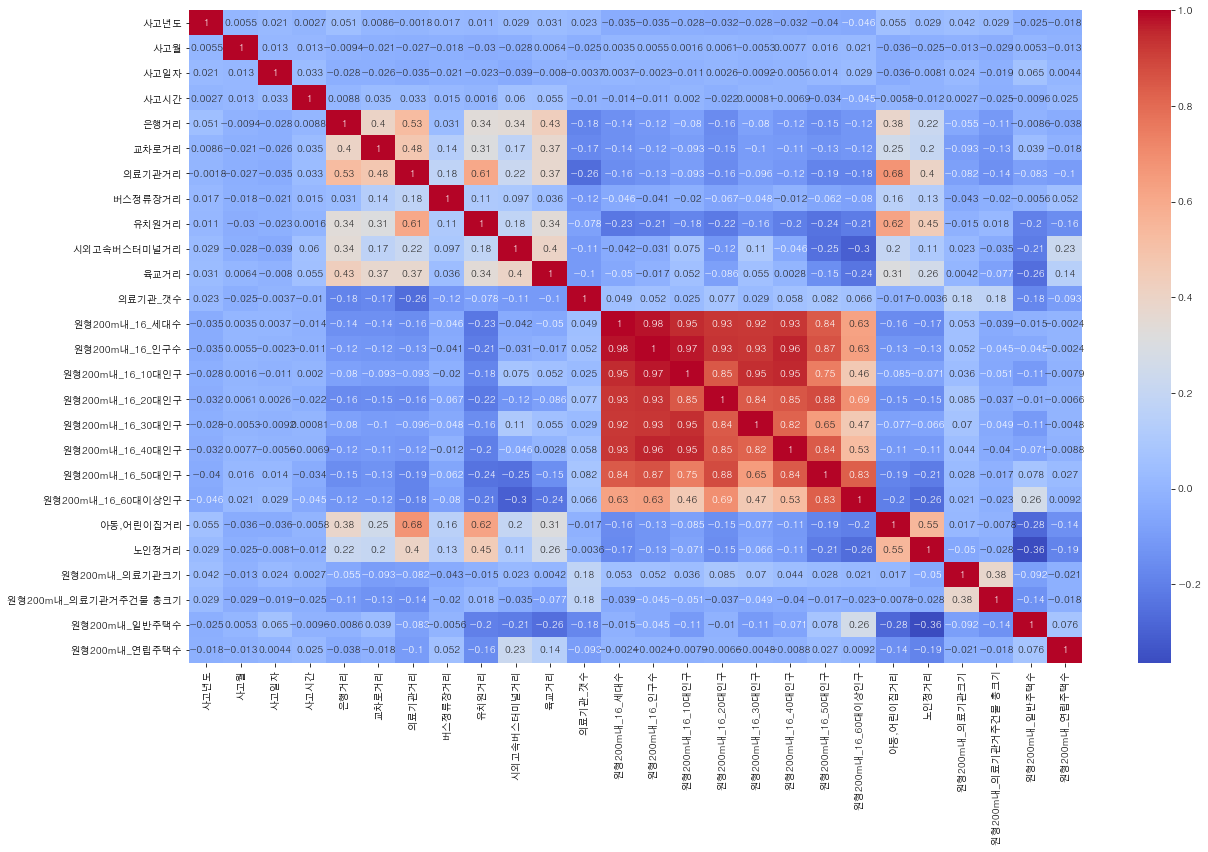

In [483]:
#그냥 여기 놔둠 재미있으라고
## vif 작업도 꼭꼭꼭 병행하자!!!!!!!!!!!!!

sns.heatmap(data_2.corr(),annot=True,cmap='coolwarm')

In [484]:
# 여기 다시 지정하자


data_2['사고년도'] = data_2['사고년도'].astype(int)
data_2['사고월'] = data_2['사고월'].astype(int)
data_2['사고일자'] = data_2['사고일자'].astype(int)
data_2['사고시간'] = data_2['사고시간'].astype(int)


data_2['의료기관_갯수'] = data_2['의료기관_갯수'].astype(float)

data_2['은행거리'] = data_2['은행거리'].astype(float)
data_2['교차로거리'] = data_2['교차로거리'].astype(float)
data_2['의료기관거리'] = data_2['의료기관거리'].astype(float)
data_2['버스정류장거리'] = data_2['버스정류장거리'].astype(float)
data_2['유치원거리'] = data_2['유치원거리'].astype(float)
data_2['시외고속버스터미널거리'] = data_2['시외고속버스터미널거리'].astype(float)
data_2['육교거리'] = data_2['육교거리'].astype(float)
data_2['원형200m내_16_세대수'] = data_2['원형200m내_16_세대수'].astype(float)
data_2['원형200m내_16_인구수'] = data_2['원형200m내_16_인구수'].astype(float)
data_2['원형200m내_16_10대인구'] = data_2['원형200m내_16_10대인구'].astype(float)
data_2['원형200m내_16_20대인구'] = data_2['원형200m내_16_20대인구'].astype(float)
data_2['원형200m내_16_30대인구'] = data_2['원형200m내_16_30대인구'].astype(float)
data_2['원형200m내_16_40대인구'] = data_2['원형200m내_16_40대인구'].astype(float)
data_2['원형200m내_16_50대인구'] = data_2['원형200m내_16_50대인구'].astype(float)
data_2['원형200m내_16_60대이상인구'] = data_2['원형200m내_16_60대이상인구'].astype(float)

data_2['아동,어린이집거리'] = data_2['아동,어린이집거리'].astype(float)
data_2['노인정거리'] = data_2['노인정거리'].astype(float)

data_2['원형200m내_의료기관크기'] = data_2['원형200m내_의료기관크기'].astype(float)
data_2['원형200m내_의료기관거주건물 총크기'] = data_2['원형200m내_의료기관거주건물 총크기'].astype(float)

data_2['원형200m내_일반주택수'] = data_2['원형200m내_일반주택수'].astype(float)
data_2['원형200m내_연립주택수'] = data_2['원형200m내_연립주택수'].astype(float)

In [485]:
data_2.isnull().sum().sum()

0

In [ ]:
#여기서 변수도 만들어주고??


# 여기서 비닝 처리할까??

### 이상치 확인

In [486]:
#
#
#
#
#그다음 이상치

In [487]:
#박스 플롯 펼치기
# 재미있넹ㅋ

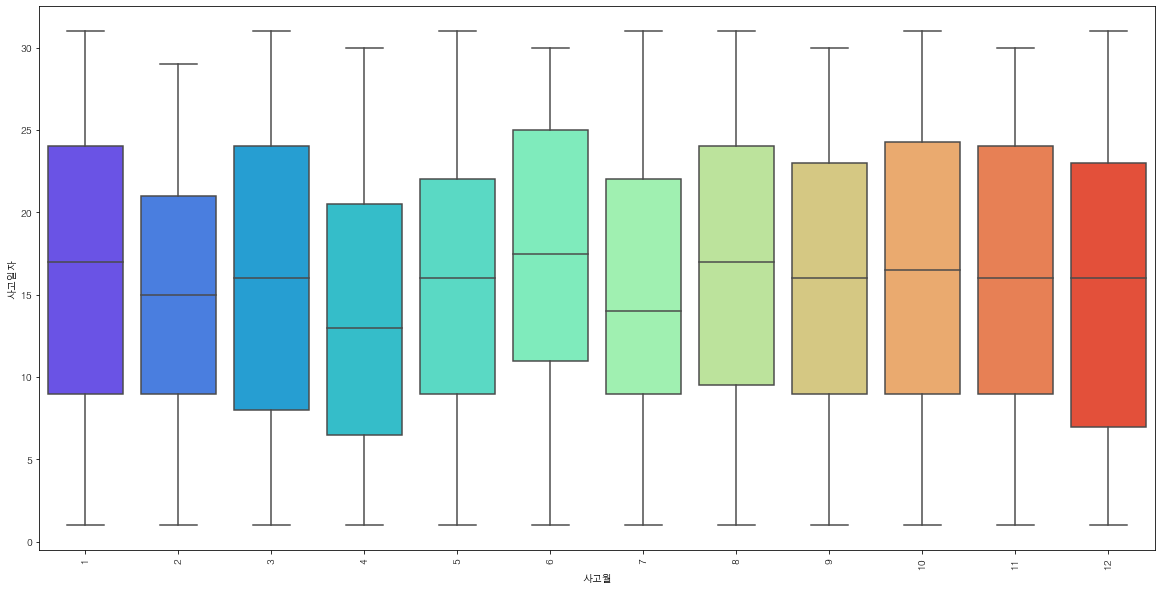

In [488]:
plt.figure(figsize=(20,10))
g = sns.boxplot(x='사고월', y='사고일자', data=data_1, palette='rainbow')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

### 로그스케일러

In [ ]:
#끝까지돌리고 다시 돌아오자

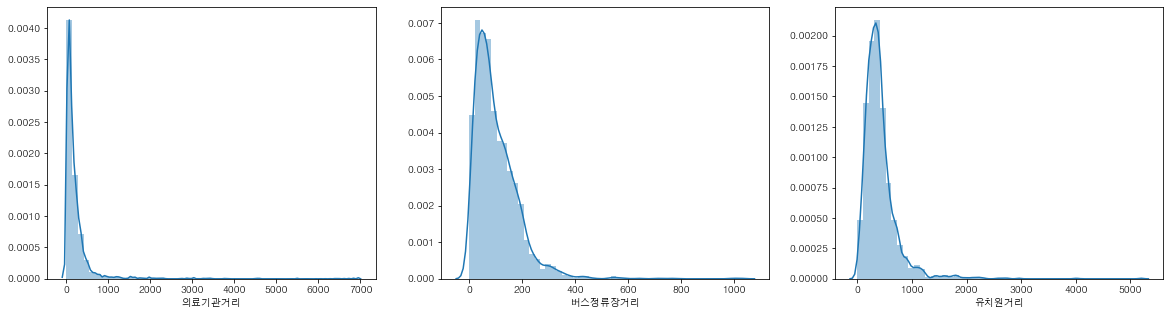

In [489]:
fig,ax = plt.subplots(figsize=(20,5),ncols=3)


sns.distplot(data_1.iloc[:,17],ax=ax[0])
sns.distplot(data_1.iloc[:,18],ax=ax[1])
sns.distplot(data_1.iloc[:,19],ax=ax[2])

In [ ]:
#하나하나

In [511]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 608964 to 613744
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   사고년도                  2256 non-null   int32  
 1   사고월                   2256 non-null   int32  
 2   사고일자                  2256 non-null   int32  
 3   사고시간                  2256 non-null   int32  
 4   사고요일                  2256 non-null   object 
 5   사고형태(Y값)              2256 non-null   object 
 6   법규위반내용                2256 non-null   object 
 7   은행거리                  2256 non-null   float64
 8   교차로거리                 2256 non-null   float64
 9   의료기관거리                2256 non-null   float64
 10  버스정류장거리               2256 non-null   float64
 11  유치원거리                 2256 non-null   float64
 12  시외고속버스터미널거리           2256 non-null   float64
 13  육교거리                  2256 non-null   float64
 14  의료기관_갯수               2256 non-null   float64
 15  원형200m내_16_세대수     

In [510]:
#nan 값이 존재한다.
#이거는 qgis로 꼭 보완해야되는존재임

## 이전꺼랑 같이 할때 애만큼은 무조건 살려야됨

data_2['중심선_1/3크기 도로폭'].value_counts(dropna=False)

nan                   875
2.6666666666666665    195
6.666666666666667     177
3.3333333333333335    163
8.333333333333334     141
5.0                   141
13.333333333333334    128
4.0                    89
20.0                   49
10.0                   37
11.666666666666666     31
2.0                    31
14.333333333333334     28
15.0                   26
2.3333333333333335     20
3.0                    19
1.6666666666666667     18
16.666666666666668     16
7.333333333333333      11
4.333333333333333       9
23.333333333333332      8
3.6666666666666665      8
1.3333333333333333      6
8.0                     5
4.666666666666667       4
5.333333333333333       3
6.333333333333333       3
7.0                     3
10.666666666666666      3
9.666666666666666       2
1.0                     2
8.666666666666666       2
6.0                     1
1.5813333333333333      1
0.6666666666666666      1
Name: 중심선_1/3크기 도로폭, dtype: int64

In [492]:
data_2['사고유형'].value_counts()

차대사람 - 횡단중           1152
차대사람 - 기타             458
차대사람 - 차도통행중          392
차대사람 - 길가장자리구역통행중     177
차대사람 - 보도통행중           77
Name: 사고유형, dtype: int64

In [493]:
data_2['기상상태'].value_counts()

맑음    1970
비      185
흐림     100
눈        1
Name: 기상상태, dtype: int64

In [494]:
#미분류는 기타에
#터널 지하차도 합치기

# 단일로 / 교차로 정도로만 맵핑하자 -->(단일+주차장) / 교차로


data_2['도로형태'].value_counts()

단일로 - 기타           1096
교차로 - 교차로안          439
교차로 - 교차로부근         312
교차로 - 교차로횡단보도내      190
기타 - 기타             113
단일로 - 횡단보도상          78
단일로 - 횡단보도부근         10
주차장 - 주차장            10
단일로 - 교량              5
단일로 - 터널              1
미분류 - 미분류             1
단일로 - 지하차도(도로)내       1
Name: 도로형태, dtype: int64

#  
# 여기는 다시 시각화를 위한 data_1

In [ ]:
# 변수명이 너무 제멋대로네ㅋㅋㅋㅋ
# 재조정 해주자

In [ ]:
# 음주/어린이/노인 재정립해주기

In [512]:
data_1.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고형태(Y값)', '사망자수', '중상자수',
       '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고', '법규위반내용', '은행거리',
       '교차로거리', '의료기관거리', '버스정류장거리', '유치원거리', '시외고속버스터미널거리', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '아동,어린이집거리', '노인정거리',
       '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기', '원형200m내_일반주택수',
       '원형200m내_연립주택수', '중심선_1/3크기 도로폭', '창원시구', '창원시동', '사고유형', '노면상태',
       '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해자 차종', '피해자 성별', '피해자 연령', '피해자 상해정도'],
      dtype='object')

In [513]:
print(data_1.isnull().sum().sum())

0


[스킵)라이트 지비엠으로](#lgbm)

# 추가변수

### 위쪽에서 이 과정을 해주는게 더 좋았을꺼 같긴하다

In [514]:
season_1 = []
for i in data_2['사고월']:
    if i >=3 and i<=5:
        season_1 = '봄'
    elif i >=6 and i<=8:
        season_1 = '여름'
    elif i >=9 and i<=11:
        season_1 = '가을'
    elif i == 12 and i == 1 and i==2:
        season_1 = '겨울'
        
data_2['season_'] =season_1

In [515]:
seperate_four = []

for season, time in zip(data_2['season_'], data_2['사고시간']):
    if season == '겨울' and time >= 0 and time <= 8:
        seperate_four.append('새벽')
    elif season == '겨울' and time > 8 and time <= 12:
        seperate_four.append('오전')
    elif season == '겨울' and time > 12 and time < 18:
        seperate_four.append('오후')
    elif season == '겨울' and time >= 18 and time <= 23:
        seperate_four.append('저녁')    
    elif season == '봄' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '봄' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '봄' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '봄' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
    elif season == '여름' and time >= 0 and time <= 6:
        seperate_four.append('새벽')
    elif season == '여름' and time > 6 and time <= 12:
        seperate_four.append('오전')
    elif season == '여름' and time > 12 and time < 20:
        seperate_four.append('오후')
    elif season == '여름' and time >= 20 and time <= 23:
        seperate_four.append('저녁')
    elif season == '가을' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '가을' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '가을' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '가을' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
        
data_2['하루분기'] = seperate_four

In [ ]:
# 변수 세팅덜 끝남
# 순화변수

In [ ]:
#상관계수 확인

In [516]:
data_2.shape

(2256, 37)

In [517]:
#50개가 날라갔네;;;

data_2.corr().shape

(26, 26)

# 2/11 여기까지함<<
#  
#  

In [44]:
data_1.corr()

,사고년도,사고월,사고일자,사고시간,사고년월일,사망자수,중상자수,경상자수,부상신고자수,은행거리,...,노인정거리,원형200m내_의료기관크기,원형200m내_의료기관거주건물 총크기,원형200m내_일반주택수,원형200m내_연립주택수,중심선_차로수,중심선_도로폭,중심선_기재된 도로폭,도로구간_도로길이,도로구간_도로폭
사고년도,1.000000,0.003487,0.019163,0.001449,0.999105,0.028012,-0.004193,-0.012382,0.015468,0.051641,...,0.028517,0.057661,0.043166,-0.026714,-0.017719,-0.060324,-0.055187,-0.016147,-0.008829,-0.009626
사고월,0.003487,1.000000,0.012528,0.012809,0.045768,0.004806,0.007503,0.006371,-0.013108,-0.008733,...,-0.016672,-0.003739,-0.013979,0.004055,-0.014229,0.028430,0.015995,0.030085,0.023994,0.051836
사고일자,0.019163,0.012528,1.000000,0.031772,0.020723,0.048878,-0.002853,-0.029723,-0.005786,-0.025725,...,-0.000889,0.032944,-0.026227,0.061869,0.003877,-0.018385,-0.027397,-0.042946,-0.015290,-0.018439
사고시간,0.001449,0.012809,0.031772,1.000000,0.002022,-0.056675,-0.039261,0.047342,0.011623,0.009341,...,-0.011098,0.007396,-0.027574,-0.008940,0.025330,-0.040564,-0.040943,-0.033512,-0.022801,-0.045317
사고년월일,0.999105,0.045768,0.020723,0.002022,1.000000,0.028237,-0.003874,-0.012130,0.014892,0.051190,...,0.027781,0.057457,0.042488,-0.026449,-0.018298,-0.059062,-0.054463,-0.014895,-0.007820,-0.007447
사망자수,0.028012,0.004806,0.048878,-0.056675,0.028237,1.000000,-0.195393,-0.167673,-0.038947,0.066095,...,0.031830,0.069573,0.017870,-0.020785,-0.036721,0.141239,0.137749,0.141906,0.151692,0.152289
중상자수,-0.004193,0.007503,-0.002853,-0.039261,-0.003874,-0.195393,1.000000,-0.788477,-0.177192,0.004434,...,0.012798,-0.023285,-0.063486,0.008122,-0.004454,0.127180,0.113389,0.079739,0.057531,0.114166
경상자수,-0.012382,0.006371,-0.029723,0.047342,-0.012130,-0.167673,-0.788477,1.000000,-0.157869,-0.018801,...,0.002591,-0.018554,0.072717,-0.008099,0.022150,-0.164664,-0.156388,-0.126876,-0.106379,-0.154294
부상신고자수,0.015468,-0.013108,-0.005786,0.011623,0.014892,-0.038947,-0.177192,-0.157869,1.000000,0.010894,...,-0.024206,0.036273,-0.021099,-0.010813,-0.012273,-0.039168,-0.035171,-0.035064,-0.020709,-0.044964
은행거리,0.051641,-0.008733,-0.025725,0.009341,0.051190,0.066095,0.004434,-0.018801,0.010894,1.000000,...,0.222903,-0.034575,-0.090965,-0.009075,-0.037720,-0.060005,-0.096349,-0.055019,0.324219,-0.060070


In [51]:
data_1.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고년월일', '사고형태(Y값)', '사고구분',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고',
       '법규위반내용', '시도코드', '시군구코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행', '은행거리',
       '가까운교차로', '교차로거리', '가까운의료기관', '의료기관거리', '가까운버스정류장', '버스정류장거리', '가까운유치원',
       '유치원거리', '가까운시외/고속버스터미널', '시외고속버스터미널거리', '가까운육교번호', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '가까운 아동,어린이집', '아동,어린이집거리',
       '가까운 노인정', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭',
       '중심선_일반통행', '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가',
       '도로구간_도로명', '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무',
       '인도_종류', '창원시구', '창원시동', 'geometry', '사고유형', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 차종', '가해운전자 성별'

In [48]:
data_1.corr().columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고년월일', '사망자수', '중상자수', '경상자수',
       '부상신고자수', '은행거리', '교차로거리', '의료기관거리', '버스정류장거리', '유치원거리', '시외고속버스터미널거리',
       '육교거리', '의료기관_갯수', '원형200m내_16_세대수', '원형200m내_16_인구수',
       '원형200m내_16_10대인구', '원형200m내_16_20대인구', '원형200m내_16_30대인구',
       '원형200m내_16_40대인구', '원형200m내_16_50대인구', '원형200m내_16_60대이상인구',
       '아동,어린이집거리', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_차로수', '중심선_도로폭', '중심선_기재된 도로폭',
       '도로구간_도로길이', '도로구간_도로폭'],
      dtype='object')

In [ ]:
# 날라간 50개

#y값이 날라갔어!!!!
#내맘대로도 날라갔어!!

In [55]:
la = list(data_1.columns)
lb = list(data_1.corr().columns)

In [57]:
la_sub_lb = [x for x in la if x not in lb]
la_sub_lb

['사고요일',
 '사고형태(Y값)',
 '사고구분',
 '음주운전사고',
 '어린이사고',
 '노인사고',
 '보행자사고',
 '법규위반내용',
 '시도코드',
 '시군구코드',
 '시도코드',
 'X(위치)',
 'Y(위치)',
 '가까운은행',
 '가까운교차로',
 '가까운의료기관',
 '가까운버스정류장',
 '가까운유치원',
 '가까운시외/고속버스터미널',
 '가까운육교번호',
 '가까운 아동,어린이집',
 '가까운 노인정',
 '중심선_분리대유무',
 '중심선_일반통행',
 '중심선_1/3크기 도로폭',
 '분리대_구조',
 '분리대길이_사용불가',
 '도로구간_도로명',
 '연속지적도_도로명',
 '인도_자전거도로 유/무',
 '인도_종류',
 '창원시구',
 '창원시동',
 'geometry',
 '사고유형',
 '법규위반',
 '노면상태',
 '기상상태',
 '도로형태',
 '가해운전자 차종',
 '가해운전자 성별',
 '가해운전자 연령',
 '가해운전자 상해정도',
 '피해자 차종',
 '피해자 성별',
 '피해자 연령',
 '피해자 상해정도',
 '내맘대로',
 'season_',
 '하루분기']

In [ ]:
#최대한 살릴까?

'''
['사고요일',                이건는 원핫하기는아깝고
 '사고형태(Y값)',           이건 살리고
 '사고구분',                ??
 '음주운전사고',            해야됨?
 '어린이사고',              해야됨?
 '노인사고',                해야됨?
 '보행자사고',              해야됨?
 '법규위반내용',            해야됨?
 '시도코드',                해야됨?
 '시군구코드',           해야됨?
 '시도코드',             해야됨?
 'X(위치)',              해야됨?
 'Y(위치)',              해야됨?
 '가까운은행',                
 '가까운교차로',             
 '가까운의료기관',
 '가까운버스정류장',
 '가까운유치원',
 '가까운시외/고속버스터미널',
 '가까운육교번호',
 '가까운 아동,어린이집',
 '가까운 노인정',
 '중심선_분리대유무',            왜 날라감?
 '중심선_일반통행',              왜 날라감?
 '중심선_1/3크기 도로폭',        왜 날라감?
 '분리대_구조',                  왜 날라감?
 '분리대길이_사용불가',          왜 날라감?
 '도로구간_도로명',             
 '연속지적도_도로명',
 '인도_자전거도로 유/무',
 '인도_종류',
 '창원시구',
 '창원시동',
 'geometry',
 '사고유형',
 '법규위반',
 '노면상태',
 '기상상태',
 '도로형태',
 '가해운전자 차종',
 '가해운전자 성별',
 '가해운전자 연령',
 '가해운전자 상해정도',
 '피해자 차종',
 '피해자 성별',
 '피해자 연령',
 '피해자 상해정도',
 '내맘대로',
 'season_',
 '하루분기']
 '''

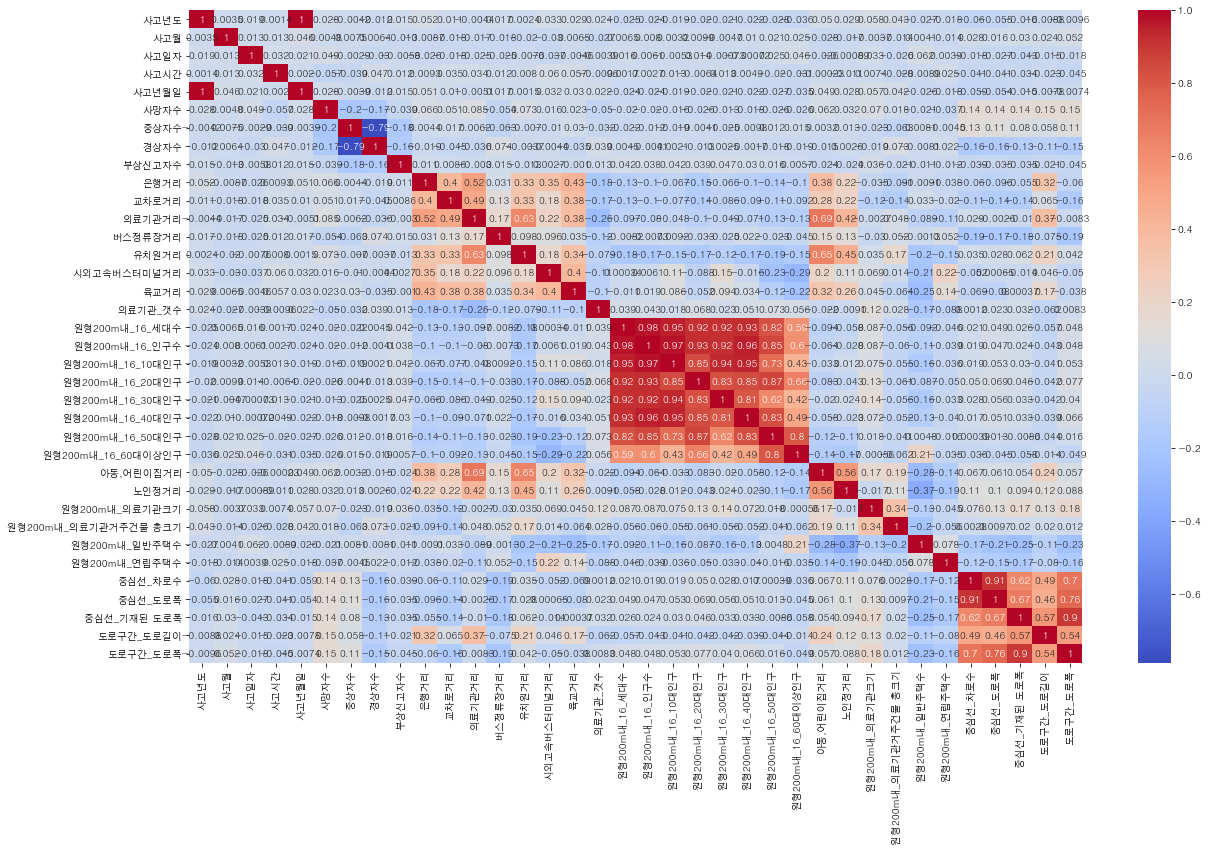

In [45]:
sns.heatmap(data_1.corr(),annot=True,cmap='coolwarm')

In [ ]:
#중상자랑 경상자수가 왜 비슷하지?
#이걸 클러스터일 할수 있었는데;; 모르겠넹

In [ ]:
# 뭘버릴지 선택해야된다.

#더미화 한것 순서도 생각해야된다.

# EDA

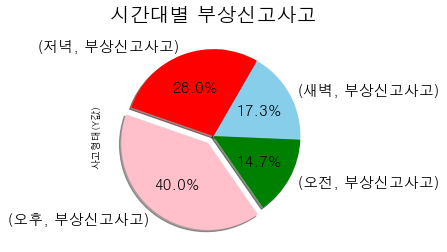

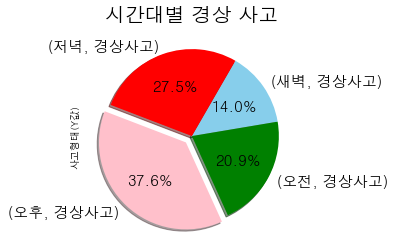

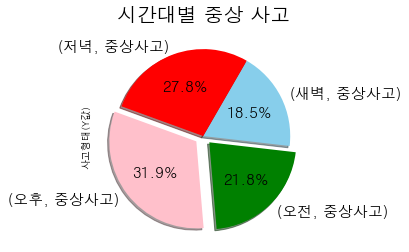

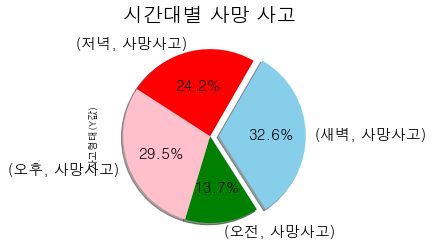

In [38]:
%matplotlib notebook
%matplotlib inline
#plt.rcParams["figure.figsize"] = (20,20)

example = data_1.copy()   #좋네

plt.figure(0)
plt.title('시간대별 부상신고사고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0,0,0.1,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile.png', dpi=fig.dpi)

plt.figure(1)
plt.title('시간대별 경상 사고',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0,0,0.1,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile2.png', dpi=fig.dpi)


plt.figure(2)
plt.title('시간대별 중상 사고',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0,0.1,0.1,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile3.png', dpi=fig.dpi)


plt.figure(3)
plt.title('시간대별 사망 사고',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['하루분기'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(counterclock=False,startangle=60,explode = [0.1,0,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'pink','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile4.png', dpi=fig.dpi)

In [39]:
line_1 = example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].count()
line_2 = example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].count()
line_3 = example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].count()
line_4 = example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].count()

In [40]:
line_1 =pd.DataFrame(line_1)
line_2 =pd.DataFrame(line_2)
line_3 =pd.DataFrame(line_3)
line_4 =pd.DataFrame(line_4)

In [41]:
concat_line =pd.concat([line_1,line_2,line_3,line_4],axis=1)

In [42]:
concat_line.columns = ['부상신고사고','경상사고','중상사고','사망사고']

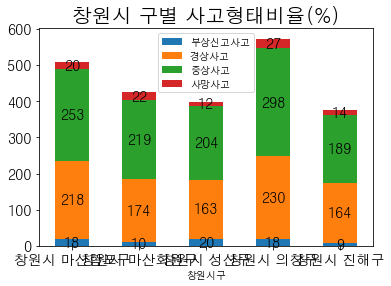

<Figure size 720x720 with 0 Axes>

In [43]:
ax = concat_line.plot(kind='bar', stacked=True, rot=0,fontsize=14) 
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.f"%(height), xy=(left+width/2, bottom+height/2), ha='center', va='center',fontsize= 14)


plt.title("창원시 구별 사고형태비율(%)", fontsize = 20)
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (20,12)
plt.sca(ax) 

#fig = plt.gcf()
#fig.savefig('myfile_bar.png', dpi=fig.dpi)

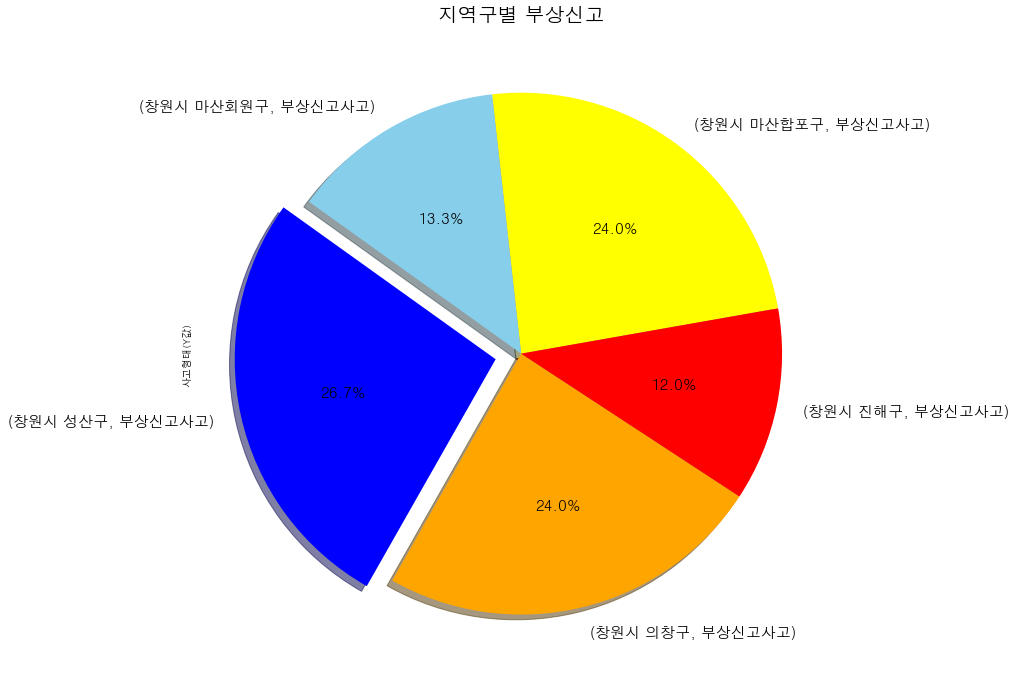

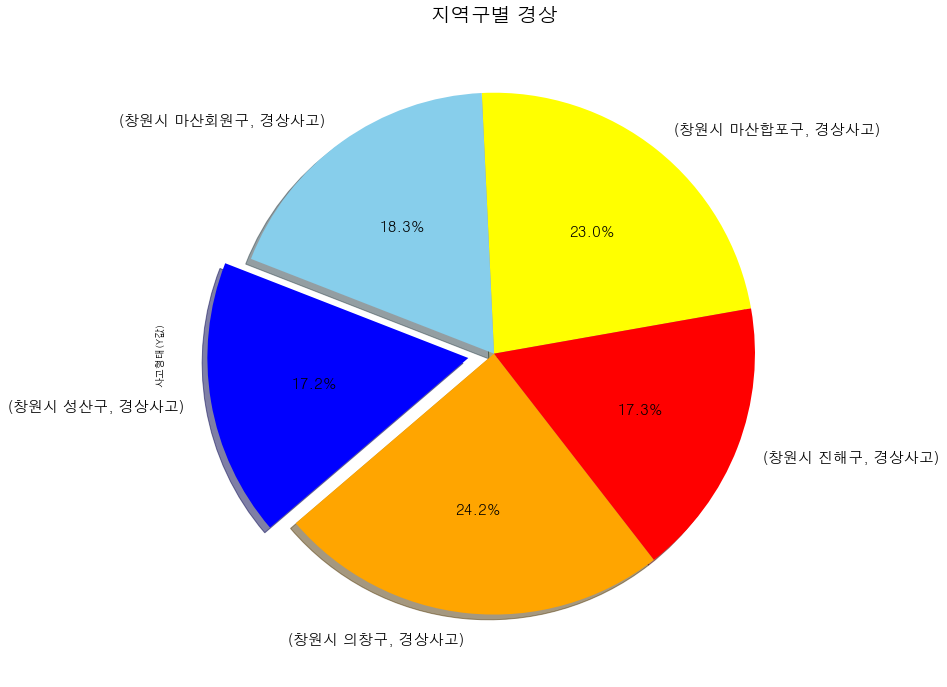

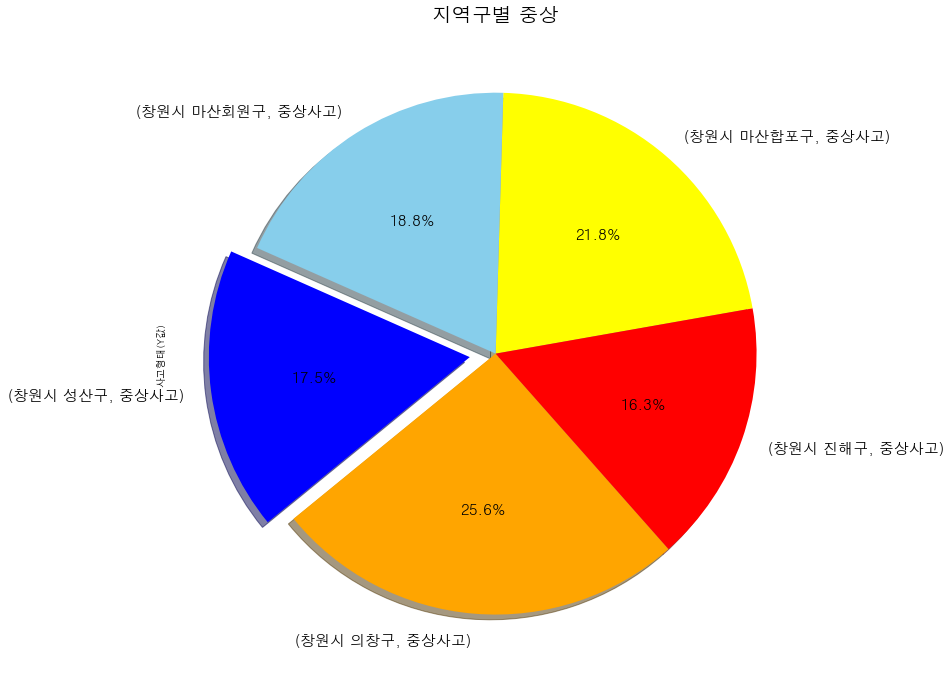

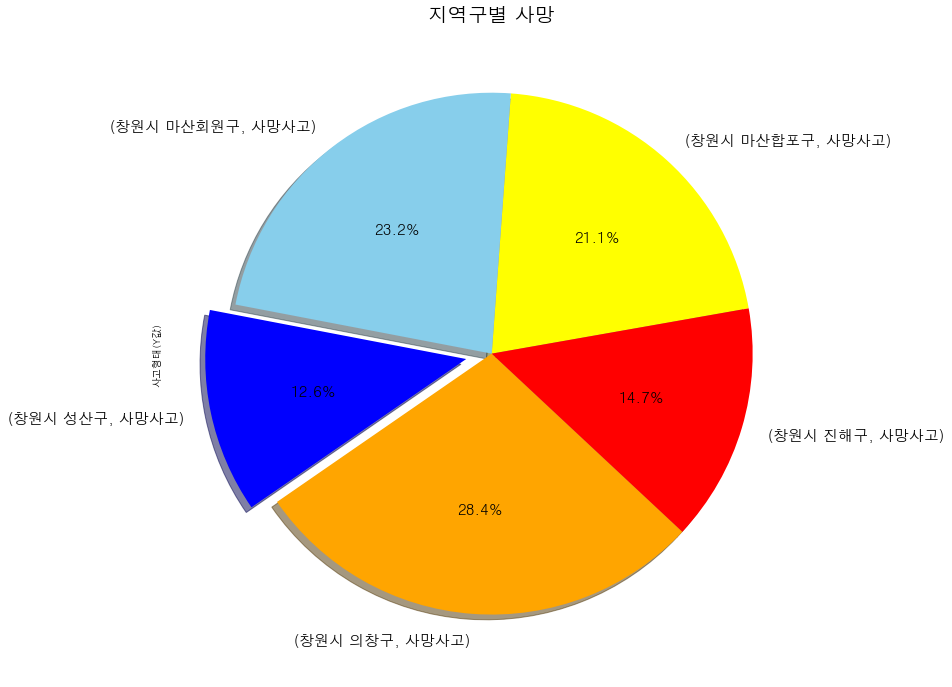

In [49]:
plt.rcParams["figure.figsize"] = (12,12)

plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile0.png', dpi=fig.dpi)


plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile1.png', dpi=fig.dpi)


plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile2.png', dpi=fig.dpi)


plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})
fig = plt.gcf()
fig.savefig('myfile3.png', dpi=fig.dpi)

In [50]:
#2016~2018년도 사망사고 비율 확인

In [51]:
example = df[df['사고년도']==2016].copy()

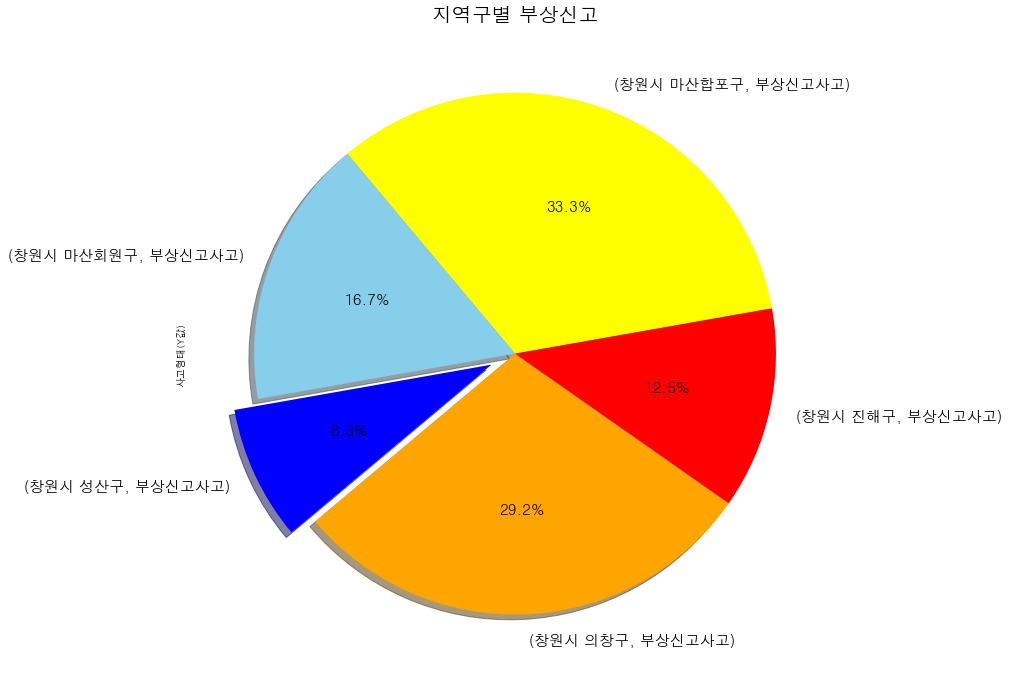

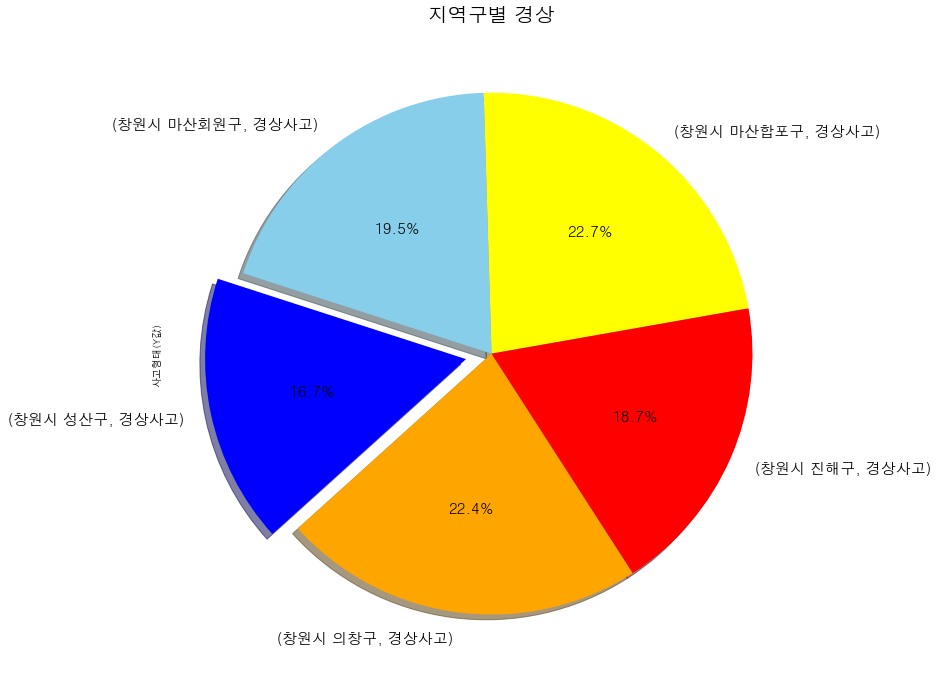

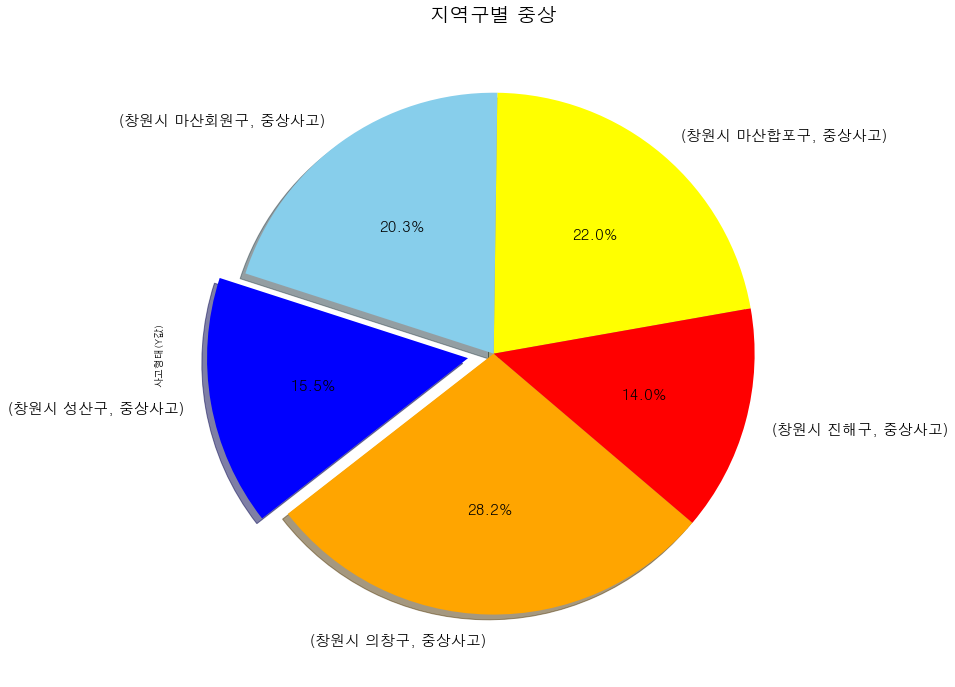

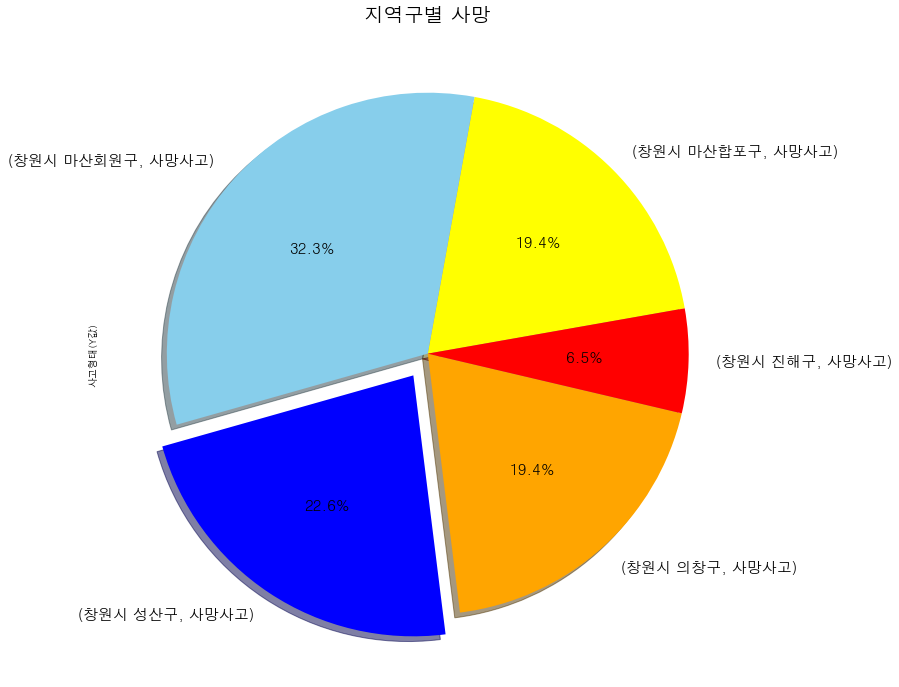

In [52]:
plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

In [53]:
example = df[df['사고년도']==2017].copy()

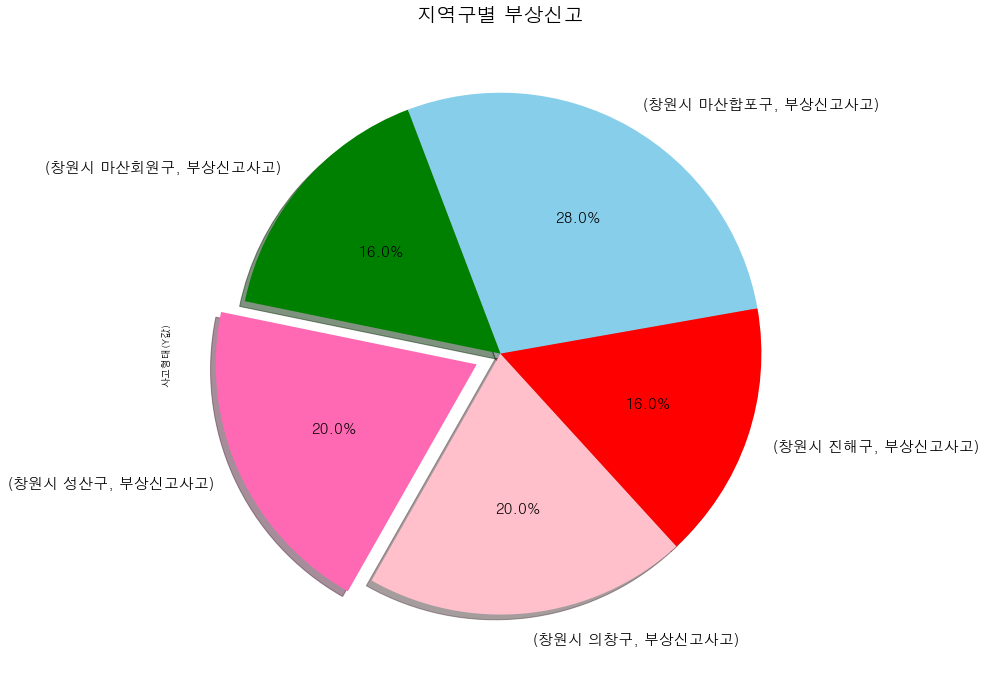

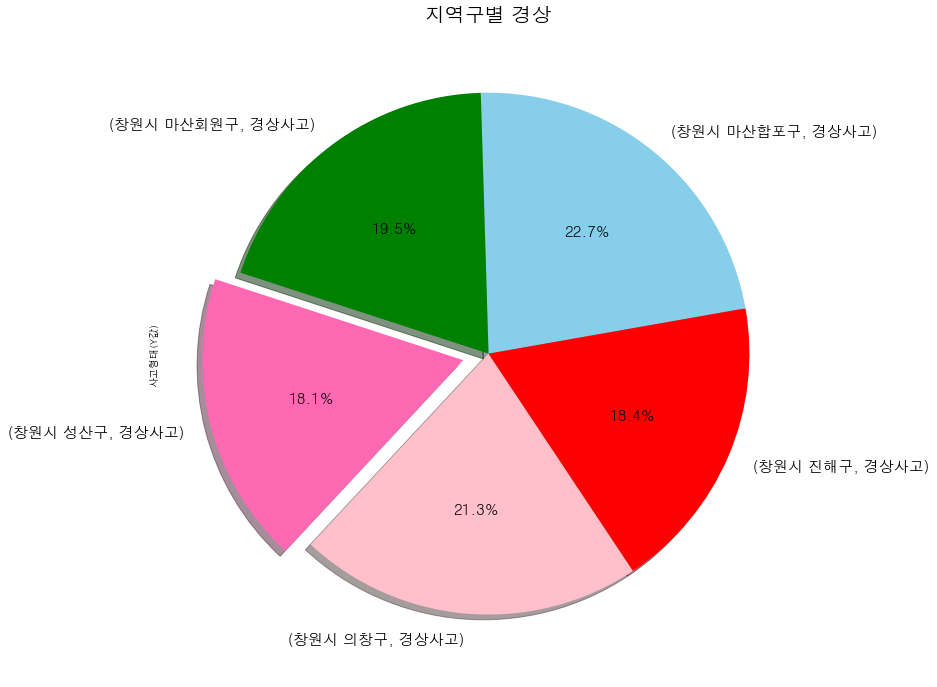

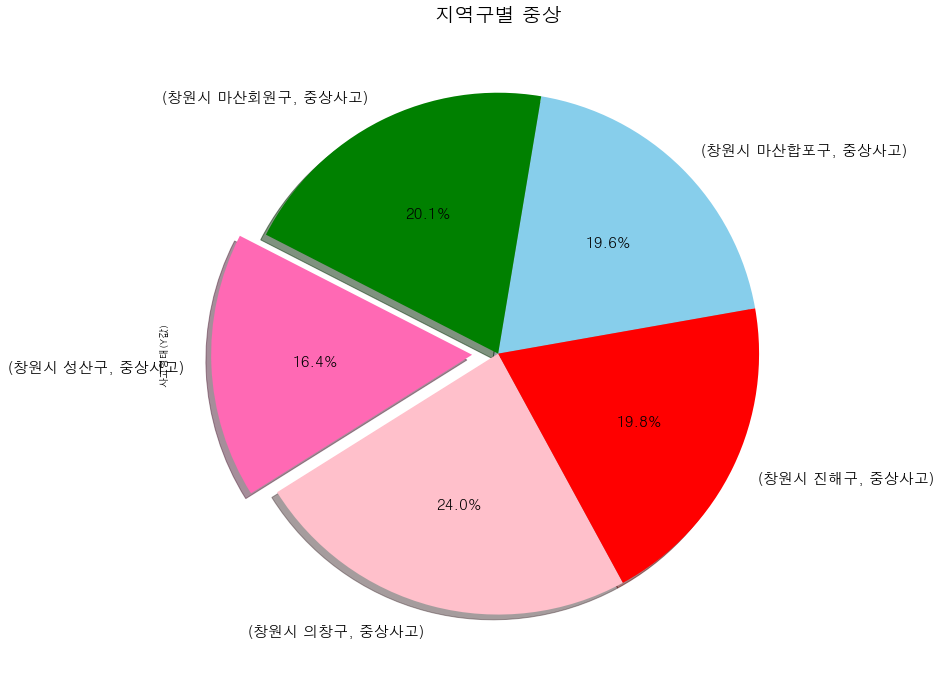

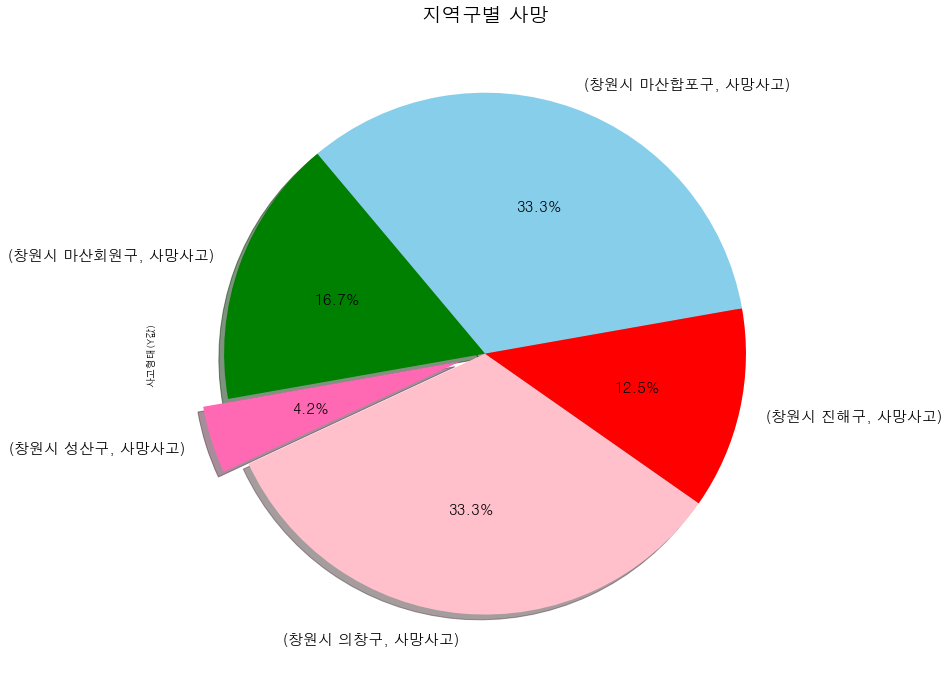

In [54]:
plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['skyblue', 'green', 'hotpink', 'pink','red'],textprops={'fontsize': 15})

In [55]:
example = df[df['사고년도']==2018].copy()

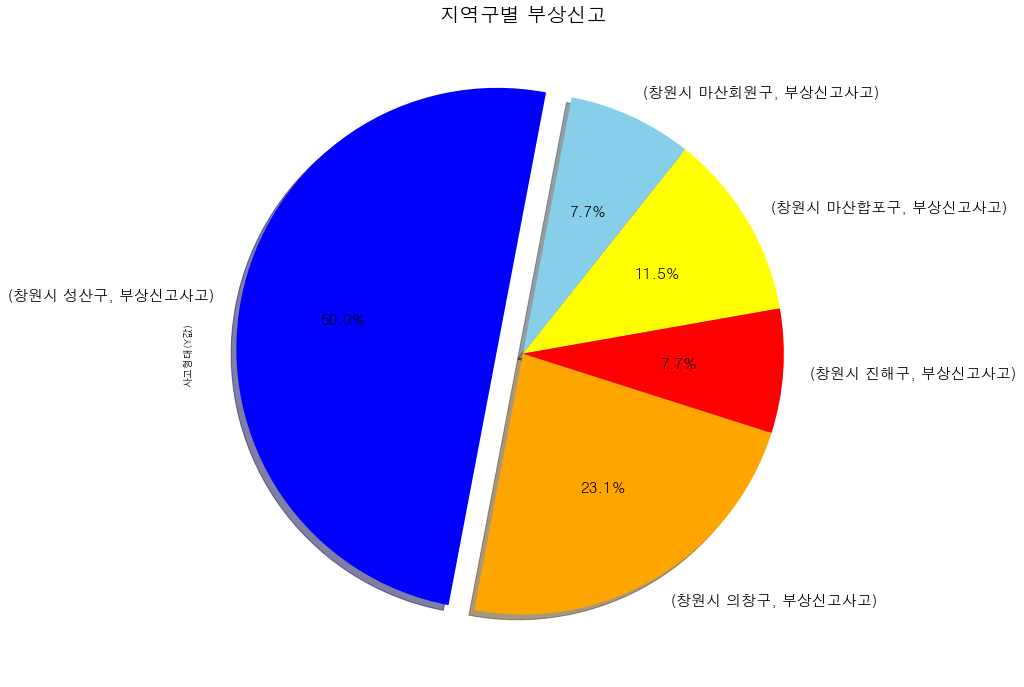

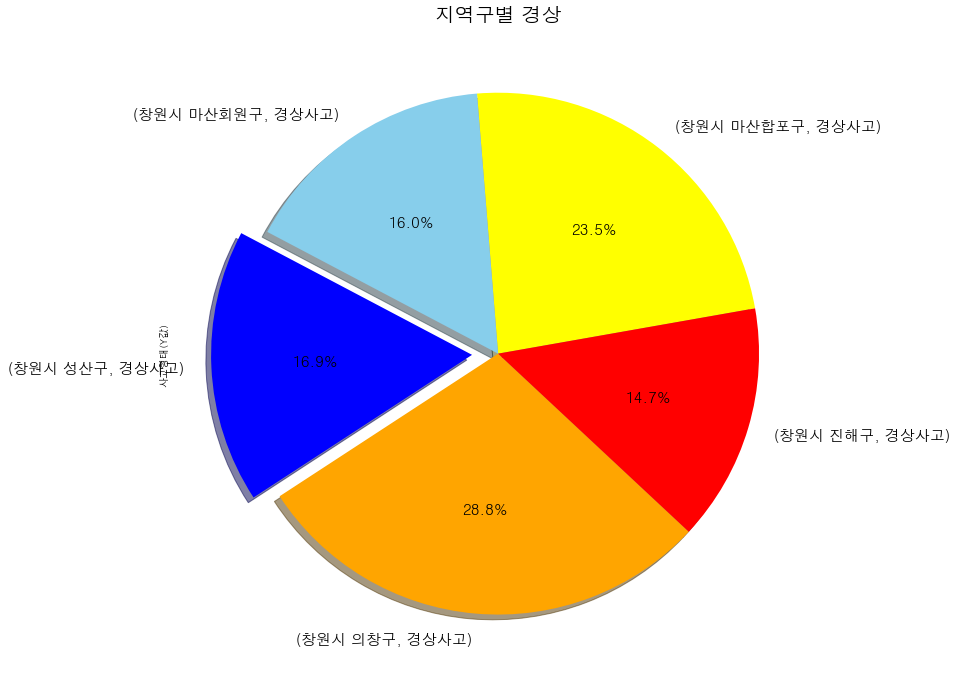

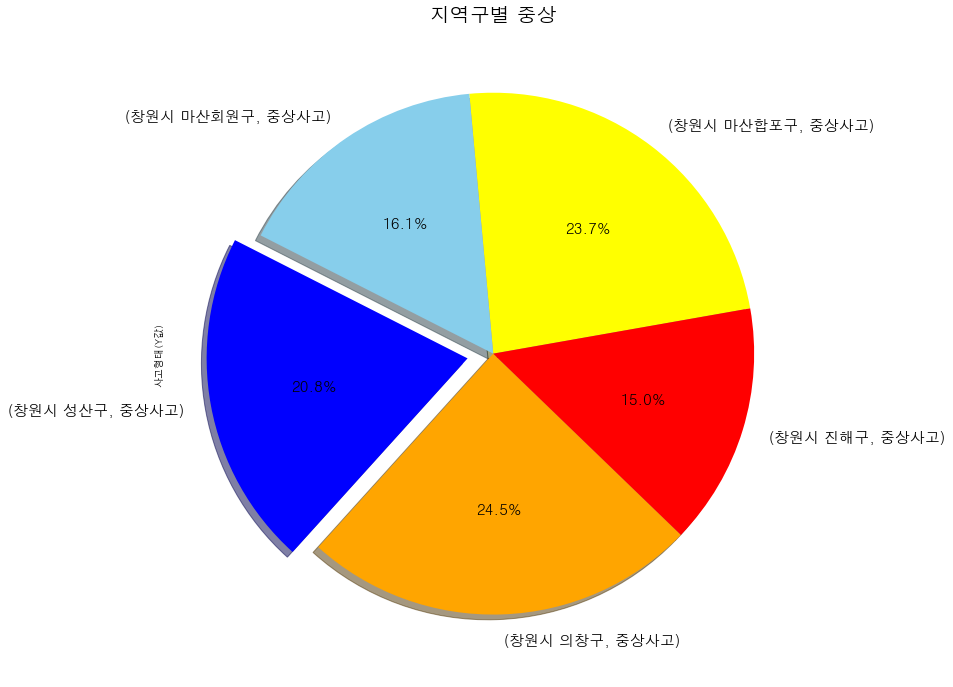

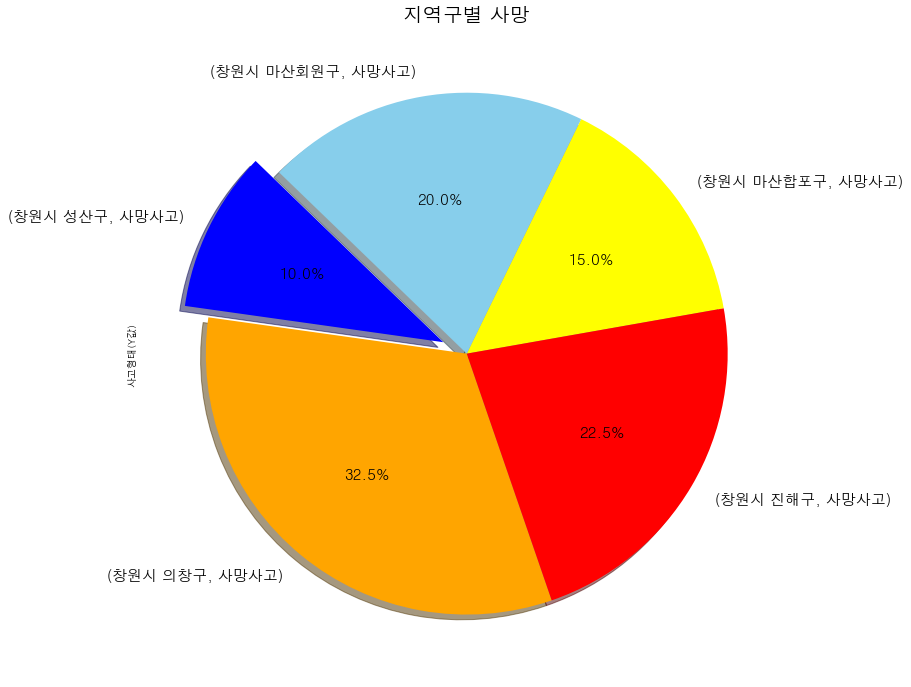

In [56]:
plt.figure(0)
plt.title('지역구별 부상신고',fontsize=20)
example[example['사고형태(Y값)'] == '부상신고사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(1)
plt.title('지역구별 경상',fontsize=20)
example[example['사고형태(Y값)'] == '경상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(2)
plt.title('지역구별 중상',fontsize=20)
example[example['사고형태(Y값)'] == '중상사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

plt.figure(3)
plt.title('지역구별 사망',fontsize=20)
example[example['사고형태(Y값)'] == '사망사고'].groupby(['창원시구'])['사고형태(Y값)'].value_counts().astype(float).\
    plot.pie(startangle=10,explode = [0,0,0.1,0,0], shadow=True, autopct='%1.1f%%', colors = ['yellow','skyblue','blue','orange','red'],textprops={'fontsize': 15})

In [57]:
#기조는 편치 않는다.

In [58]:
#시간

In [59]:
#example = data_1[data_1['사고형태(Y값)']=='중상사고'].copy()
#example = data_1[(data_1['사고형태(Y값)']=='경상사고')|(data_1['사고형태(Y값)']=='중상사고') | (data_1['사고형태(Y값)']=='사망사고')].copy()

In [60]:
###


example = data_1.copy()
#example =example[example['기상상태']=='맑음']
#example =example[(example['사고요일']=='월요일')|(example['사고요일']=='화요일')|(example['사고요일']=='수요일')|(example['사고요일']=='목요일')|(example['사고요일']=='금요일')].copy()

In [155]:
example.groupby(['사고시간'])['사고시간'].count()

사고시간
0      69
1      50
2      40
3      31
4      31
5      45
6      58
7      68
8     100
9      84
10     97
11     96
12     99
13     93
14    104
15    121
16    126
17    153
18    189
19    139
20    164
21    117
22    113
23     95
Name: 사고시간, dtype: int64

In [156]:
#example1 =example[example['창원시구']=='창원시 마산합포구'].copy()

In [158]:
#example_2 =example[example['창원시구']=='창원시 진해구']
#example_2

,사고년도,사고월,사고일자,사고시간,사고요일,사고년월일,사고형태(Y값),사고구분,사망자수,중상자수,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해자 차종,피해자 성별,피해자 연령,피해자 상해정도,내맘대로,season_,하루분기
id,,,,,,,,,,,,,,,,,,,,,
613963,2016,8,6,10,토요일,20160806,사망사고,차대사람,1,0,...,남,58세,상해없음,보행자,남,35세,사망,center_line,가을,오전
614005,2018,11,21,14,수요일,20181121,사망사고,차대사람,1,0,...,남,37세,상해없음,보행자,남,58세,사망,road_acc,가을,오후
613811,2017,5,12,2,금요일,20170512,사망사고,차대사람,1,0,...,남,65세,상해없음,보행자,남,53세,사망,center_line,가을,새벽
613818,2017,7,18,22,화요일,20170718,중상사고,차대사람,0,1,...,남,30세,상해없음,보행자,남,56세,중상,cneter_line,가을,저녁
613853,2018,12,2,2,일요일,20181202,중상사고,차대사람,0,1,...,남,25세,상해없음,보행자,남,35세,중상,center_line,가을,새벽
613174,2017,9,18,13,월요일,20170918,중상사고,차대사람,0,1,...,남,59세,상해없음,보행자,여,40세,중상,center_line,가을,오후
613284,2016,5,13,9,금요일,20160513,중상사고,차대사람,0,1,...,남,48세,상해없음,보행자,여,68세,중상,center_line,가을,오전
613400,2017,12,3,21,일요일,20171203,중상사고,차대사람,0,1,...,남,55세,상해없음,보행자,여,45세,중상,center_line,가을,저녁
614094,2016,2,20,8,토요일,20160220,경상사고,차대사람,0,0,...,남,66세,상해없음,보행자,남,49세,경상,road_acc,가을,오전


In [171]:
B_line=pd.DataFrame()

example_2 =example[example['창원시구']=='창원시 마산합포구']
#example_2 = example
for i in range(0,24):
    a_line = pd.DataFrame(data={'시간':example_2.groupby(['사고시간'])['사고시간'].count()[i]/example_2.groupby(['사고시간'])['사고시간'].count().sum()},index=[i])
    B_line = pd.concat([B_line,a_line],axis=0)
    B_line

In [ ]:
#example_2 =example[example['창원시구']=='창원시 마산합포구']
#example_2 = example
#for i in range(0,24):
    a_line = pd.DataFrame(data={'시간':example_2.groupby(['사고시간'])['사고시간'].count()[i]/example_2.groupby(['사고시간'])['사고시간'].count().sum()},index=[i])
    B_line = pd.concat([B_line,a_line],axis=0)
    B_line

In [172]:
#전체_시간순 = B_line
#마산합포구_시간순 = B_line
#마산회원구_시간순 = B_line
#의창구_시간순 = B_line
#성산구_시간순 = B_line
#진해구_시간순 = B_line

In [187]:
#새로한건 뭔가를 잘못했다;;

전체_시간순 = 전체_시간순/2

In [188]:
print(example.groupby(['하루분기'])['사고시간'].count()[0]/example.groupby(['하루분기'])['사고시간'].count().sum())
print(example.groupby(['하루분기'])['사고시간'].count()[1]/example.groupby(['하루분기'])['사고시간'].count().sum())
print(example.groupby(['하루분기'])['사고시간'].count()[2]/example.groupby(['하루분기'])['사고시간'].count().sum())
print(example.groupby(['하루분기'])['사고시간'].count()[3]/example.groupby(['하루분기'])['사고시간'].count().sum())

0.17177914110429449
0.2085889570552147
0.3444347063978966
0.2751971954425942


In [189]:
example[example['창원시구']=='창원시 마산합포구'].groupby(['사고시간'])['사고시간'].count()

사고시간
0     17
1     13
2      5
3      7
4      7
5     13
6     20
7     15
8     17
9     15
10    28
11    22
12    28
13    19
14    30
15    30
16    31
17    29
18    45
19    32
20    26
21    27
22    17
23    16
Name: 사고시간, dtype: int64

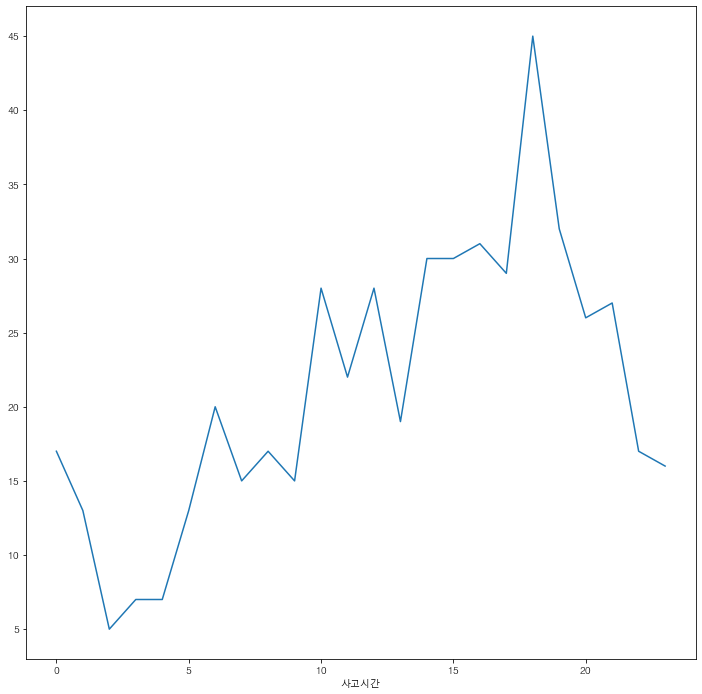

In [190]:
example[example['창원시구']=='창원시 마산합포구'].groupby(['사고시간'])['사고시간'].count().plot()

In [191]:
example[example['창원시구']=='창원시 의창구'].groupby(['사고시간'])['사고시간'].count()

사고시간
0     16
1      4
2      9
3      8
4      5
5      9
6     17
7     10
8     28
9     21
10    27
11    21
12    25
13    26
14    26
15    28
16    31
17    43
18    44
19    34
20    50
21    28
22    34
23    29
Name: 사고시간, dtype: int64

In [192]:
example[example['창원시구']=='창원시 성산구'].groupby(['사고시간'])['사고시간'].count()

사고시간
0     15
1     16
2      7
3      6
4      7
5     10
6      9
7     14
8     11
9     14
10    13
11    16
12     8
13    15
14    14
15    25
16    18
17    28
18    29
19    23
20    34
21    22
22    23
23    22
Name: 사고시간, dtype: int64

In [193]:
example[example['창원시구']=='창원시 마산회원구'].groupby(['사고시간'])['사고시간'].count()

사고시간
0     13
1     12
2     15
3      8
4      7
5      6
6     10
7     20
8     18
9      9
10    18
11    26
12    16
13    19
14    13
15    19
16    25
17    28
18    31
19    25
20    27
21    20
22    23
23    17
Name: 사고시간, dtype: int64

In [194]:
example[example['창원시구']=='창원시 진해구'].groupby(['사고시간'])['사고시간'].count()

사고시간
0      8
1      5
2      4
3      2
4      5
5      7
6      2
7      9
8     26
9     25
10    11
11    11
12    22
13    14
14    21
15    19
16    21
17    25
18    40
19    25
20    27
21    20
22    16
23    11
Name: 사고시간, dtype: int64

In [195]:
전체_시간순.columns=['전체_시간별']
마산합포구_시간순.columns=['합포구_시간별']
마산회원구_시간순.columns=['회원구_시간별']
의창구_시간순.columns=['의창구_시간별']
성산구_시간순.columns=['성산구_시간별']
진해구_시간순.columns=['진해구_시간별']

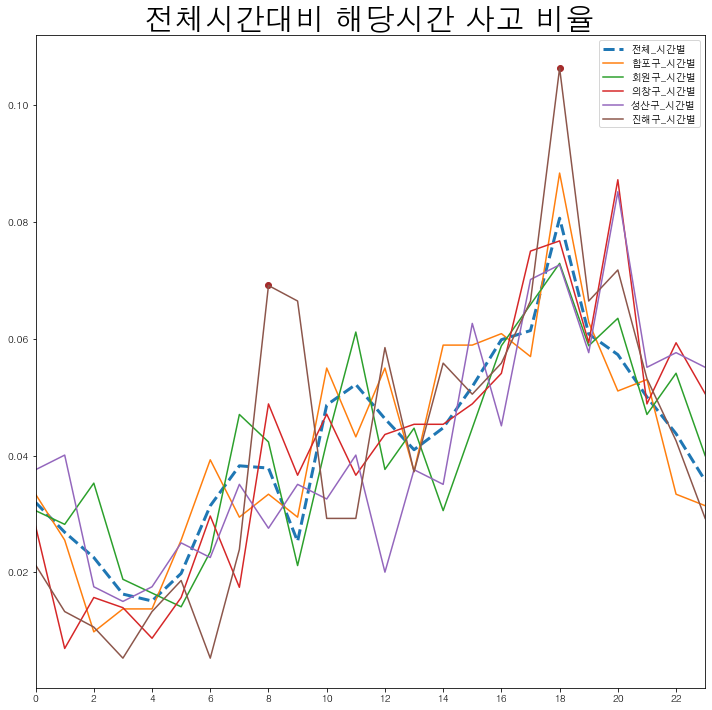

In [196]:
plt.xlim(0,23)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])

전체_시간순['전체_시간별'].plot(linewidth = 3,linestyle = '--')
마산합포구_시간순['합포구_시간별'].plot(linestyle = '-')
마산회원구_시간순['회원구_시간별'].plot(linestyle = '-')
의창구_시간순['의창구_시간별'].plot(linestyle = '-')
성산구_시간순['성산구_시간별'].plot(linestyle = '-')
진해구_시간순['진해구_시간별'].plot(linestyle = '-')

plt.legend() 
plt.title('전체시간대비 해당시간 사고 비율',fontsize=30)

plt.scatter(8,진해구_시간순['진해구_시간별'][8],c='brown')
plt.scatter(18,진해구_시간순['진해구_시간별'][18],c='brown')



#  
# Y값

In [62]:
data_1.loc[data_1['사고형태(Y값)'] == '부상신고사고','Y']=False
data_1.loc[data_1['사고형태(Y값)'] == '경상사고','Y']=False
data_1.loc[data_1['사고형태(Y값)'] == '중상사고','Y']=True   #true
data_1.loc[data_1['사고형태(Y값)'] == '사망사고','Y']=True   #true

In [63]:
#구별 특징

#성산구 작아짐
#합포구 노인
#회원구?? 병원?  시간?
#진해구는 출퇴근
#의창구는?? 야간에 매우 높다.

# 결측치 처리

In [64]:
data_1.shape

(2282, 87)

In [65]:
#200m이내 세대수 크기는 0으로  ##수동으로 확인 해보자 qgis에서

#차로수,도로폭#도로길이,도로폭은 없애자..1/3도로폭은 살아있네
#중심선_차로수,중심선_도로폭,중심선_기재된 도로폭,_도로구간_도로길이,도로구간_도로폭


#법규위반애들은 다빼리자 그리고 시작하자


#사고유형은 개수가 더 적은니까 위에꺼 빼면서 같이 날라갈듯.

In [66]:
data_1['원형200m내_16_세대수'] = data_1['원형200m내_16_세대수'].fillna(0)
data_1['원형200m내_16_인구수'] = data_1['원형200m내_16_인구수'].fillna(0)
data_1['원형200m내_16_10대인구'] = data_1['원형200m내_16_10대인구'].fillna(0)
data_1['원형200m내_16_20대인구'] = data_1['원형200m내_16_20대인구'].fillna(0)
data_1['원형200m내_16_30대인구'] = data_1['원형200m내_16_30대인구'].fillna(0)
data_1['원형200m내_16_40대인구'] = data_1['원형200m내_16_40대인구'].fillna(0)
data_1['원형200m내_16_50대인구'] = data_1['원형200m내_16_50대인구'].fillna(0)
data_1['원형200m내_16_60대이상인구'] = data_1['원형200m내_16_60대이상인구'].fillna(0)
data_1['원형200m내_의료기관크기'] = data_1['원형200m내_의료기관크기'].fillna(0)
data_1['원형200m내_의료기관거주건물 총크기'] = data_1['원형200m내_의료기관거주건물 총크기'].fillna(0)
#data_1[''].fillna(0)

In [67]:
data_1['중심선_차로수'] = data_1['중심선_차로수'].fillna(-99)
data_1['중심선_도로폭'] = data_1['중심선_도로폭'].fillna(-99)
data_1['중심선_기재된 도로폭'] = data_1['중심선_기재된 도로폭'].fillna(-99)
data_1['도로구간_도로길이'] = data_1['도로구간_도로길이'].fillna(-99)
data_1['도로구간_도로폭'] = data_1['도로구간_도로폭'].fillna(-99)

In [68]:
data_2 = data_1.dropna(axis=1)

In [69]:
data_2.isnull().sum()

사고년도                    0
사고월                     0
사고일자                    0
사고시간                    0
사고요일                    0
사고년월일                   0
사고형태(Y값)                0
사고구분                    0
사망자수                    0
중상자수                    0
경상자수                    0
부상신고자수                  0
음주운전사고                  0
어린이사고                   0
노인사고                    0
보행자사고                   0
법규위반내용                  0
시도코드                    0
시군구코드                   0
시도코드                    0
X(위치)                   0
Y(위치)                   0
가까운은행                   0
은행거리                    0
가까운교차로                  0
교차로거리                   0
가까운의료기관                 0
의료기관거리                  0
가까운버스정류장                0
버스정류장거리                 0
가까운유치원                  0
유치원거리                   0
가까운시외/고속버스터미널           0
시외고속버스터미널거리             0
가까운육교번호                 0
육교거리                    0
의료기관_갯수                 0
원형200m내_16_세대수          0
원형200m내_16_인

In [70]:
data_2.shape         #????

(2282, 74)

In [71]:
#사용할 변수 선정

In [72]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 608964 to 614141
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   사고년도                  2282 non-null   int32  
 1   사고월                   2282 non-null   int32  
 2   사고일자                  2282 non-null   int32  
 3   사고시간                  2282 non-null   int32  
 4   사고요일                  2282 non-null   object 
 5   사고년월일                 2282 non-null   int32  
 6   사고형태(Y값)              2282 non-null   object 
 7   사고구분                  2282 non-null   object 
 8   사망자수                  2282 non-null   int32  
 9   중상자수                  2282 non-null   int32  
 10  경상자수                  2282 non-null   int32  
 11  부상신고자수                2282 non-null   int32  
 12  음주운전사고                2282 non-null   object 
 13  어린이사고                 2282 non-null   object 
 14  노인사고                  2282 non-null   object 
 15  보행자사고              

In [73]:
data_2.columns

Index(['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고년월일', '사고형태(Y값)', '사고구분',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고',
       '법규위반내용', '시도코드', '시군구코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행', '은행거리',
       '가까운교차로', '교차로거리', '가까운의료기관', '의료기관거리', '가까운버스정류장', '버스정류장거리', '가까운유치원',
       '유치원거리', '가까운시외/고속버스터미널', '시외고속버스터미널거리', '가까운육교번호', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '가까운 아동,어린이집', '아동,어린이집거리',
       '가까운 노인정', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭',
       '중심선_일반통행', '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가',
       '도로구간_도로명', '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무',
       '인도_종류', '창원시구', '창원시동', 'geometry', '내맘대로', 'season_', '하루분기', 'Y'],
      dtype='object')

In [74]:
len(data_2.columns)

74

In [75]:
data_3 =data_2[['사고년도', '사고월', '사고일자', '사고시간', '사고요일', '사고년월일', '사고형태(Y값)', '사고구분',
       '사망자수', '중상자수', '경상자수', '부상신고자수', '음주운전사고', '어린이사고', '노인사고', '보행자사고',
       '법규위반내용', '시도코드', '시군구코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행', '은행거리',
       '가까운교차로', '교차로거리', '가까운의료기관', '의료기관거리', '가까운버스정류장', '버스정류장거리', '가까운유치원',
       '유치원거리', '가까운시외/고속버스터미널', '시외고속버스터미널거리', '가까운육교번호', '육교거리', '의료기관_갯수',
       '원형200m내_16_세대수', '원형200m내_16_인구수', '원형200m내_16_10대인구',
       '원형200m내_16_20대인구', '원형200m내_16_30대인구', '원형200m내_16_40대인구',
       '원형200m내_16_50대인구', '원형200m내_16_60대이상인구', '가까운 아동,어린이집', '아동,어린이집거리',
       '가까운 노인정', '노인정거리', '원형200m내_의료기관크기', '원형200m내_의료기관거주건물 총크기',
       '원형200m내_일반주택수', '원형200m내_연립주택수', '중심선_분리대유무', '중심선_차로수', '중심선_도로폭',
       '중심선_일반통행', '중심선_1/3크기 도로폭', '중심선_기재된 도로폭', '분리대_구조', '분리대길이_사용불가',
       '도로구간_도로명', '도로구간_도로길이', '도로구간_도로폭', '연속지적도_도로명', '인도_자전거도로 유/무',
       '인도_종류', '창원시구', '창원시동', 'geometry', '내맘대로', 'season_', '하루분기', 'Y']]

In [76]:
data_3.rename(columns={'사고년도':'year',
                       '사고월':'month',
                       '사고일자':'day',
                       '사고시간':'time',
                       '사고요일':'Day_of_Week',
                       '사고년월일':'YMD',

                       '사고형태(Y값)':'사고형태(Y값)',
                       '사고구분':'사고구분',
                       
                       '사망자수':'death',
                       '중상자수':'H_injury',
                       '경상자수':'W_injury',
                       '부상신고자수':'S_injury',
                       '음주운전사고':'drink_acc',
                       '어린이사고':'child_acc',
                       '노인사고':'oldman_acc',
                       '보행자사고':'walk_acc',
                       '법규위반내용':'violation',
                       '시도코드':'시도코드',
                       '시군구코드':'시군구코드',
                       '시도코드':'시도코드',
                       'X(위치)':'X(위치)',
                       'Y(위치)':'Y(위치)',
                       '가까운은행':'가까운은행',
                       '가까운교차로':'가까운교차로',
                       '가까운교차로':'가까운교차로',
                       '가까운의료기관':'가까운의료기관',
                       '가까운버스정류장':'가까운버스정류장',
                       '가까운유치원':'가까운유치원',
                       '가까운시외/고속버스터미널':'가까운시외/고속버스터미널',
                       '가까운육교번호':'가까운육교번호',
                       '가까운 아동,어린이집':'가까운 아동,어린이집',
                       '가까운 노인정':'가까운 노인정',
                       
                       '은행거리':'dis_Bank',              
                       '교차로거리':'dis_Inter',            
                       '의료기관거리':'dis_Health',           
                       '버스정류장거리':'dis_Bus stop',              
                       '유치원거리':'dis_Kinder',           
                       '시외고속버스터미널거리':'dis_Bus terminal',         
                       '육교거리':'dis_Overpass',          
                       '아동,어린이집거리':'dis_Childcare',
                       '노인정거리':'dis_Senior center',
                       '의료기관_갯수':'the number Healthcare',
                       '원형200m내_의료기관크기':'IN200m_Health square',
                       '원형200m내_의료기관거주건물 총크기':'IN200m_Total Health square',
                       '원형200m내_일반주택수':'IN200m_Housing_count',
                       '원형200m내_연립주택수':'IN200m_Townhousing_count',
                       '원형200m내_16_세대수':'IN200m_Household_count',
                       '원형200m내_16_인구수':'IN200m_Population_count',
                       '원형200m내_16_10대인구':'IN200m_10pop_count',
                       '원형200m내_16_20대인구':'IN200m_20pop_count',
                       '원형200m내_16_30대인구':'IN200m_30pop_count',
                       '원형200m내_16_40대인구':'IN200m_40pop_count',
                       '원형200m내_16_50대인구':'IN200m_50pop_count',
                       '원형200m내_16_60대이상인구':'IN200m_60pop_count',
                       '중심선_분리대유무':'center_line',
                       '중심선_일반통행':'one-way traffic', 
                       '중심선_1/3크기 도로폭':'Width_Of_Road',
                       '분리대_구조':'Separator structure',
                       '분리대길이_사용불가':'분리대길이_사용불가',
                       
                       '중심선_차로수':'중심선_차로수',
                       '중심선_도로폭':'중심선_도로폭',
                       '중심선_기재된 도로폭':'중심선_기재된 도로폭',
                       
                       '도로구간_도로길이':'도로구간_도로길이',
                       '도로구간_도로폭':'도로구간_도로폭',
                       '연속지적도_도로명':'연속지적도_도로명',
                       
                       '도로구간_도로명':'도로구간_도로명',
                       '인도_자전거도로 유/무':'WoN_bicycle path',
                       '인도_종류':'Road',
                       '창원시구':'창원시구',
                       '창원시동':'창원시동',
                       'geometry':'geometry',
                       '내맘대로':'my_self',
                       'season_':'season_',
                       '하루분기':'day_qu',
                       'Y':'Y'
                      }, inplace=True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
data_3.columns

Index(['year', 'month', 'day', 'time', 'Day_of_Week', 'YMD', '사고형태(Y값)',
       '사고구분', 'death', 'H_injury', 'W_injury', 'S_injury', 'drink_acc',
       'child_acc', 'oldman_acc', 'walk_acc', 'violation', '시도코드', '시도코드',
       '시군구코드', '시도코드', '시도코드', 'X(위치)', 'Y(위치)', '가까운은행', 'dis_Bank',
       '가까운교차로', 'dis_Inter', '가까운의료기관', 'dis_Health', '가까운버스정류장',
       'dis_Bus stop', '가까운유치원', 'dis_Kinder', '가까운시외/고속버스터미널',
       'dis_Bus terminal', '가까운육교번호', 'dis_Overpass', 'the number Healthcare',
       'IN200m_Household_count', 'IN200m_Population_count',
       'IN200m_10pop_count', 'IN200m_20pop_count', 'IN200m_30pop_count',
       'IN200m_40pop_count', 'IN200m_50pop_count', 'IN200m_60pop_count',
       '가까운 아동,어린이집', 'dis_Childcare', '가까운 노인정', 'dis_Senior center',
       'IN200m_Health square', 'IN200m_Total Health square',
       'IN200m_Housing_count', 'IN200m_Townhousing_count', 'center_line',
       '중심선_차로수', '중심선_도로폭', 'one-way traffic', 'Width_Of_Road', '중심선_기재된 도로폭',
      

In [78]:
#로지스틱으로 오즈비?를 넣어주면??

In [79]:
data_3 =data_3[(data_3['창원시구']=='창원시 진해구')]

In [80]:
#data_3 =data_3[(data_3['창원시구']=='창원시 마산회원구')]

In [81]:
#원핫 변수를 여기서 미리 바꿔주자

data_3['Day_of_Week'].value_counts()

화요일    73
목요일    61
토요일    55
금요일    53
월요일    52
수요일    46
일요일    36
Name: Day_of_Week, dtype: int64

In [82]:
data_3['Day_of_Week_eng']=0

In [83]:
data_3.loc[data_3['Day_of_Week'] == '월요일','Day_of_Week_eng']='Mon'
data_3.loc[data_3['Day_of_Week'] == '화요일','Day_of_Week_eng']='Tue'
data_3.loc[data_3['Day_of_Week'] == '수요일','Day_of_Week_eng']='Wed'
data_3.loc[data_3['Day_of_Week'] == '목요일','Day_of_Week_eng']='Thu'
data_3.loc[data_3['Day_of_Week'] == '금요일','Day_of_Week_eng']='Fri'
data_3.loc[data_3['Day_of_Week'] == '토요일','Day_of_Week_eng']='Sat'
data_3.loc[data_3['Day_of_Week'] == '일요일','Day_of_Week_eng']='Sun'

In [84]:
Data_3 =data_3.copy()

In [85]:
df_1 =Data_3[['year', 'month', 'day', 'time', 'YMD',
       'dis_Bank',
       'dis_Bus stop', 'dis_Kinder',
       'dis_Bus terminal', 'dis_Overpass', 'the number Healthcare',
       'IN200m_Household_count', 'IN200m_Population_count',
       'IN200m_10pop_count', 'IN200m_20pop_count', 'IN200m_30pop_count',
       'IN200m_40pop_count', 'IN200m_50pop_count', 'IN200m_60pop_count',
       'dis_Childcare', 'dis_Senior center',
       'IN200m_Health square', 'IN200m_Total Health square',
       'IN200m_Housing_count', 'IN200m_Townhousing_count',
       'Width_Of_Road']]

y = Data_3[['Y']]

df_2 =Data_3[['my_self','Day_of_Week_eng']]
df_2 = pd.get_dummies(df_2)
#df_2 =X[['Day_of_Week','center_line','one-way traffic','Separator structure','my_self','season_','day_qu']]
#뒤에 3개정도가 쓸만하고 요일은 빈값이 별로 없어서 쓸만하겠다.  나머지는 빈값이 너무많아서 쓰면안됨.

In [86]:
#df_1 =pd.concat([df_1,df_2],axis=1)

In [87]:
df_1 =Data_3[['dis_Bank','day','time',
       'dis_Bus stop', 'dis_Kinder',
       'dis_Overpass', 'the number Healthcare',
       'IN200m_Household_count', 'IN200m_Population_count',
       'IN200m_10pop_count', 'IN200m_20pop_count',
       'IN200m_50pop_count', 'IN200m_60pop_count',
       'dis_Childcare', 'dis_Senior center',
       'IN200m_Health square', 'IN200m_Total Health square',
       'IN200m_Housing_count', 'IN200m_Townhousing_count',
       'Width_Of_Road']]

In [88]:
df_1 =Data_3[['dis_Bank','day','time',
       'dis_Bus stop',
       'dis_Overpass', 'the number Healthcare',
       'IN200m_Household_count', 'IN200m_Population_count',
       'IN200m_50pop_count', 'IN200m_60pop_count',
       'IN200m_Housing_count', 'IN200m_Townhousing_count',
       'Width_Of_Road']]

In [89]:
#df_1=pd.concat([df_1,df_2],axis=1)

In [90]:
df_1['Width_Of_Road'] =df_1['Width_Of_Road'].astype(float)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
df_1['Width_Of_Road'].replace('nan',-99,inplace = True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [92]:
pd.DataFrame(df_1['Width_Of_Road'])

,Width_Of_Road
id,
613963,3.333333
614005,NaN
613811,8.333333
613818,8.333333
613853,8.333333
613174,8.333333
613284,8.333333
613400,8.333333
614094,NaN


In [93]:
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아
#이거 정말 좋아

In [94]:
df_1['Width_Of_Road'] =pd.DataFrame(df_1['Width_Of_Road']).fillna(method='ffill') #앞에값으로 메꾼다.

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
X =df_1

In [100]:
test_1 = df_1.corr()

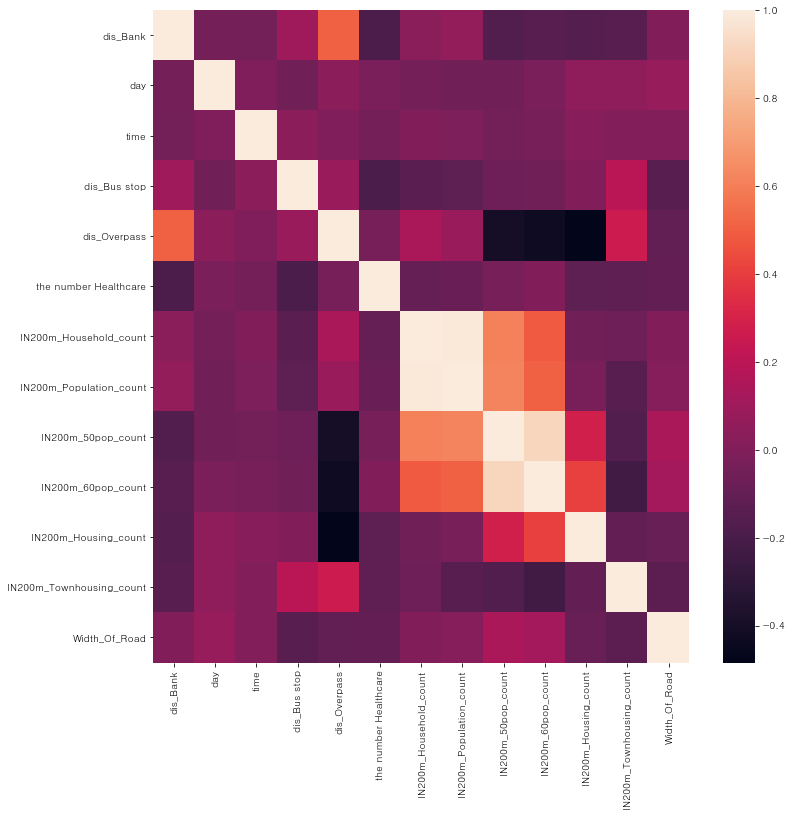

In [101]:
sns.heatmap(test_1)

In [96]:
X.isnull().sum()

dis_Bank                    0
day                         0
time                        0
dis_Bus stop                0
dis_Overpass                0
the number Healthcare       0
IN200m_Household_count      0
IN200m_Population_count     0
IN200m_50pop_count          0
IN200m_60pop_count          0
IN200m_Housing_count        0
IN200m_Townhousing_count    0
Width_Of_Road               0
dtype: int64

In [97]:
X = X.astype(float)
y = y.astype(bool)

In [250]:
aX_train, aX_test, by_train, by_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [251]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 613963 to 614408
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dis_Bank                  376 non-null    float64
 1   day                       376 non-null    float64
 2   time                      376 non-null    float64
 3   dis_Bus stop              376 non-null    float64
 4   dis_Overpass              376 non-null    float64
 5   the number Healthcare     376 non-null    float64
 6   IN200m_Household_count    376 non-null    float64
 7   IN200m_Population_count   376 non-null    float64
 8   IN200m_50pop_count        376 non-null    float64
 9   IN200m_60pop_count        376 non-null    float64
 10  IN200m_Housing_count      376 non-null    float64
 11  IN200m_Townhousing_count  376 non-null    float64
 12  Width_Of_Road             376 non-null    float64
dtypes: float64(13)
memory usage: 41.1+ KB


In [252]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 613963 to 614408
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       376 non-null    bool 
dtypes: bool(1)
memory usage: 3.3+ KB


# 라쏘

#  
# lgbm

In [253]:
#파라미터 보고서 쓰면서 하자.

In [254]:
#수치를 표현하자. 오차행렬이 가장 좋겠군.

In [255]:
import lightgbm as lgb

In [256]:
'''
lgb_params = {'learning_rate': 0.01,  #0.01
          'max_depth': -1,
          'boosting': 'gbdt',          #dart
          'objective': 'regression', 
          'metric': 'mse',                      #중요 'mse'
          'is_training_metric': True, 
          'num_leaves': 31, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.9, 
          'bagging_freq': 5, 
          'seed':42,
          }
'''

"\nlgb_params = {'learning_rate': 0.01,  #0.01\n          'max_depth': -1,\n          'boosting': 'gbdt',          #dart\n          'objective': 'regression', \n          'metric': 'mse',                      #중요 'mse'\n          'is_training_metric': True, \n          'num_leaves': 31, \n          'feature_fraction': 0.9, \n          'bagging_fraction': 0.9, \n          'bagging_freq': 5, \n          'seed':42,\n          }\n"

In [257]:
lgb_params = {'learning_rate': 0.01,  #0.01
          'max_depth': -1,
          'boosting': 'gbdt',          #dart
          'objective': 'regression', 
          'metric': 'mse',                      #중요 'mse'
          'is_training_metric': True, 
          'num_leaves': 31, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':42,
          }

In [258]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = aX_train, label = by_train) # LightGBM 모델에 맞게 변환

lgb_model = lgb.train(params = lgb_params, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(aX_test) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, by_test)))) # RMSE

RMSE: 0.5003090211046448


In [259]:
lgb_model_predict_pred =(lgb_model_predict>0.5)

In [260]:
confusion = confusion_matrix(y_true=by_test, y_pred=lgb_model_predict_pred)
print(confusion)

[[12 23]
 [14 27]]


In [261]:
(confusion[0][0]+confusion[1][1])/confusion.sum()

0.5131578947368421

In [262]:
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(aX_test) # Shap Values 계산

In [263]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], aX_test.iloc[1,:])

In [264]:
shap.force_plot(explainer.expected_value, shap_values, aX_test) 

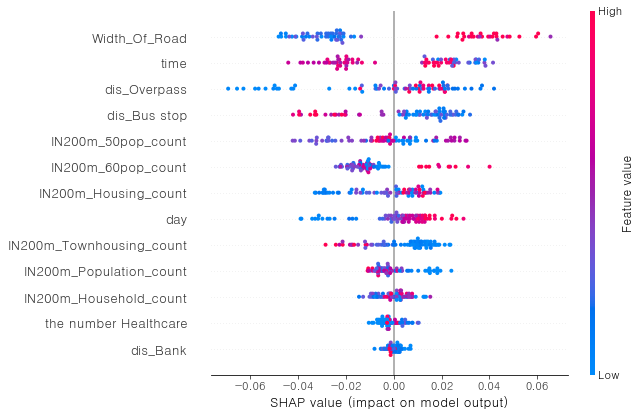

In [265]:
shap.summary_plot(shap_values, aX_test)

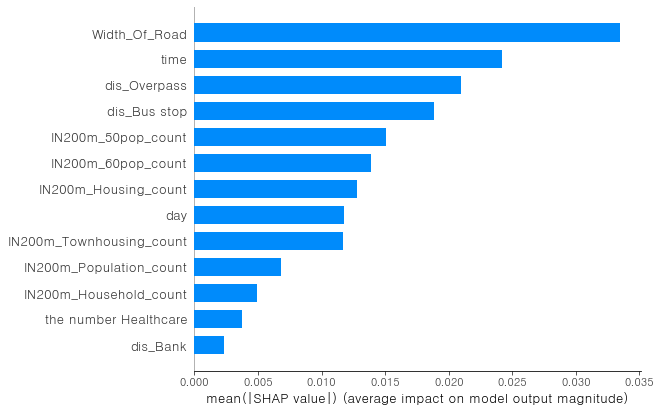

In [266]:
shap.summary_plot(shap_values, aX_test, plot_type = "bar")